<a href="https://colab.research.google.com/github/armando-lv/BEDU-Equipo3-AnalisisPython/blob/main/Notebook_Proyecto_final_(Data_Science_F3%2C_M1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# _**BEDU** | DATA SCIENCE_
## _**MÓDULO 1** (FASE 3) | ANÁLISIS DE DATOS CON PYTHON_
#### _**PROYECTO FINAL** | Colab NOTEBOOK (EQUIPO 3)_

> _**ANTES DE COMENZAR...**_
>
> _¿Qué te parece si nos ubicamos dentro del mismo contexto?_

Desde el módulo pasado, el Equipo 3 seleccionó una problemática social de interés común, a partir de la cual se redactó un escrito guía que facilitó el inicio del presente análisis de datos.

Si tienes curiosidad por conocer el escrito antes mencionado, puedes visitar este [enlace](https://docs.google.com/document/d/1wwfUJ4ZAmH6cBWL_miKNlR_3_5xI5iKGUcqG-Ijl-J4/edit) y darle un vistazo. Sin embargo, para lograr contextualizarnos, bastará con mencionar el objetivo general que perseguimos con este trabajo. Es decir: `Determinar la postura ideológica predominante entre la población mexicana hacia el fenómeno de vacunación COVID19, evaluando distintos aspectos de aceptación, así como posibles rasgos sociológicos y conductuales que estén implicados en el tema`.

Cabe mencionar también que los _datasets_ utilizados a continuación fueron procesados previamente, organizados y situados en archivos `.csv`; de modo entonces que el presente _Notebook_ da inicio con una lectura de dichos archivos.

Finalmente, si tienes curiosidad por conocer el origen de nuestros datos y el procedimiento que seguimos para procesarlos, puedes visitar el siguiente [enlace](https://colab.research.google.com/drive/1irL6j0hV3PCo--oHpsDgedOZjckVLVX0#scrollTo=6avDa8Wuzm3i) y darle un vistazo al _Notebook_ que creamos desde el módulo anterior.

> _**ADEMÁS...**_
>
> _En este punto del desarrollo, afortunadamente ya se tiene una perspectiva mucho más clara de la problemática. Por lo tanto, se identificaron ya, de manera precisa, cuáles son los datos que nos servirán para responder adecuadamente nuestras preguntas y cuáles no._
>
> _De modo que, sí o sí, es necesario aplicar un pequeño procesamiento nuevamente con la intención de optimizar el análisis de nuestros datos y reducir el tamaño de los datasets_.

In [1]:
import pandas as pd # Se importa la primera librería que vamos a utilizar.

In [2]:
ruta_de_acceso = "https://raw.githubusercontent.com/armando-lv/BEDU-Equipo3-AnalisisPython/main" # Mediante esta línea de código se fija la ruta en la cual
                                                                                                 # tenemos ubicados nuestros 'datsets'. Nota que se trata de
                                                                                                 # la 'URL' de nuestro repositorio de GitHub.

In [3]:
df1 = pd.read_csv(ruta_de_acceso + "/Dataset_1.csv", index_col = 0, header = [0, 1], engine='python')
df1.rename(columns = {"Unnamed: 3_level_0": ""}, inplace = True) # 'Dataset' 1.

df2 = pd.read_csv(ruta_de_acceso + "/Dataset_2.csv", index_col = 0, header = [0, 1], engine='python')
df2.rename(columns = {"Unnamed: 3_level_0": ""}, inplace = True) # 'Dataset' 2.

df3 = pd.read_csv(ruta_de_acceso + "/Dataset_3.csv", index_col = 0, header = [0, 1], engine='python')
df3.rename(columns = {"Unnamed: 3_level_0": ""}, inplace = True) # 'Dataset' 3.

In [4]:
df1_dropped = df1.drop(columns = [("know_people_sick", "indicator_percentage"),
                                  ("know_people_sick", "sample_size"),
                                  ("food_lackness_concern", "indicator_percentage"),
                                  ("food_lackness_concern", "sample_size")]) # Se eliminan las columnas del primer 'dataset' que se consideraron poco
                                                                             # útiles para responder nuestras preguntas.
df2_dropped = df2.drop(columns = [("trust_politicians_recommendation", "indicator_percentage"),
                                  ("trust_politicians_recommendation", "sample_size")]) # Se eliminan las columnas del segundo 'dataset' que se consideraron
                                                                                        # poco útiles para responder nuestras preguntas.

# Nota que el tercer conjunto de datos quedó intacto, pues eventualmente todas sus columnas nos aportarán información para responder preguntas.

> _**AHORA SÍ, SIN MÁS POR EL MOMENTO...**_
>
> _¿Qué te parece si comenzamos?_

In [5]:
# Se declara el resto de paquetes y librerías que se utilizarán a lo largo de este 'Notebook'.
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import skew, kurtosis

## _**Sesión 1:** Estimados de locación y variabilidad_

El objetivo de esta sesión es obtener distintos estimados de locación y variabilidad para nuestro conjunto de datos. Como resultado, se generó un _dataframe_ considerando los siguientes indicadores.

`accept_vaccine`: indica cuál es el porcentaje de la población que acepta la vacuna.

`financial_concern`: indica cuál es el porcentaje de la población que se preocupa por su estado financiero (hasta cierto punto es un indicador del estatus socioeconómico de quienes contestaron la encuesta).

`barrier_side_effects`: inidica cuál es el porcentaje de la población que considera que los efectos secundarios de la vacuna son un impedimento para aplicársela.

Cabe mencionar que, conforme se vaya avanzando en el _Notebook_, más indicadores irán apareciendo. No obstante ya habrás notado que su significado se puede intuir mediante el nombre.

#### _1.1. Preocupación financiera `(financial_concern)`_

###### _1.1.1. Extracción de columnas y tratamiento de datos_

In [6]:
df1_dropped.head(2) # Se observa cómo está construido el 'dataframe'.

survey_information              ...    financial_concern            
  region_where_applied survey_date  ... indicator_percentage sample_size
0       Aguascalientes  2020-11-23  ...             0.630136        6991
1       Aguascalientes  2020-11-24  ...             0.619214        7853

[2 rows x 9 columns]

In [7]:
df1_columnas_sin_indexar = df1_dropped.copy()
df1_columnas_sin_indexar.columns = df1_columnas_sin_indexar.columns.droplevel(0)
df1_columnas_sin_indexar.head(2) # Nota que se eliminaron los multi-índices; la idea es facilitarnos el manejo posterior de los datos.

,region_where_applied,survey_date,survey_date_short,indicator_percentage,sample_size,indicator_percentage,sample_size,indicator_percentage,sample_size
0,Aguascalientes,2020-11-23,2020-11,0.023153,8453,0.899553,7455,0.630136,6991
1,Aguascalientes,2020-11-24,2020-11,0.020100,9490,0.901764,8354,0.619214,7853


In [8]:
df_1_financial_corcern = df1_columnas_sin_indexar.iloc[:, [0, 2, 7, 8]]
df_1_financial_corcern.head(2) # Se extraen únicamente las columnas de interés.

,region_where_applied,survey_date_short,indicator_percentage,sample_size
0,Aguascalientes,2020-11,0.630136,6991
1,Aguascalientes,2020-11,0.619214,7853


In [9]:
amount_of_positive_answers = round(df_1_financial_corcern.sample_size * df_1_financial_corcern.indicator_percentage).astype(int)
df_1_financial_corcern.insert(4, 'amount_of_positive_answers', amount_of_positive_answers)
df_1_financial_corcern.head(2) # Se tomó la decisión de agregar una columna con el número total de respuestas positivas.
                               # Nota que es una simple multiplicación entre los valores de las dos columnas ya existentes.

,region_where_applied,survey_date_short,indicator_percentage,sample_size,amount_of_positive_answers
0,Aguascalientes,2020-11,0.630136,6991,4405
1,Aguascalientes,2020-11,0.619214,7853,4863


###### _1.1.2. Cálculo de la **media aritmética simple**_

In [10]:
media = df_1_financial_corcern['amount_of_positive_answers'].mean()
mediatot_01 = df_1_financial_corcern['sample_size'].mean()

print(f'En promedio, {media:.0f} mexicanos, de los {mediatot_01:.0f} encuestados diariamente, se preocupan por su situación financiera.')
print(f'Por lo tanto, el {round(100 * media / mediatot_01, 2)}% de los mexicanos se preocupa por su situación financiera.')

En promedio, 3365 mexicanos, de los 5612 encuestados diariamente, se preocupan por su situación financiera.
Por lo tanto, el 59.96% de los mexicanos se preocupa por su situación financiera.


###### _1.1.3. Cálculo de la **media ponderada**_

In [11]:
total_personas_entrevistadas = df_1_financial_corcern['sample_size'].sum()
weight_of_sample = df_1_financial_corcern['sample_size'] / total_personas_entrevistadas
df_1_financial_corcern_02 = df_1_financial_corcern.copy()
df_1_financial_corcern_02.insert(4, 'weight_of_sample', weight_of_sample)
df_1_financial_corcern_02.head(2) # Nota que se aplicó una simple regla de tres para obtener el peso o ponderación de cada muestra.

,region_where_applied,survey_date_short,indicator_percentage,sample_size,weight_of_sample,amount_of_positive_answers
0,Aguascalientes,2020-11,0.630136,6991,0.000176,4405
1,Aguascalientes,2020-11,0.619214,7853,0.000198,4863


In [12]:
# La formula para obtener la media ponderada es: sum(w_i * x_i) / sum(w_i).
# En nuestro caso 'w_i' es el 'weight_of_sample' y 'x_i' es la variable 'amount_of_positive_answers'.
sum_w_i = (df_1_financial_corcern_02['weight_of_sample'].sum())
w_i_x_i = (df_1_financial_corcern_02['weight_of_sample']) * (df_1_financial_corcern_02['amount_of_positive_answers'])
df_1_financial_corcern_02.insert(6, 'w_i_x_i', w_i_x_i)
df_1_financial_corcern_02.head(2)

,region_where_applied,survey_date_short,indicator_percentage,sample_size,weight_of_sample,amount_of_positive_answers,w_i_x_i
0,Aguascalientes,2020-11,0.630136,6991,0.000176,4405,0.776668
1,Aguascalientes,2020-11,0.619214,7853,0.000198,4863,0.963142


In [13]:
sum_w_i_x_i = df_1_financial_corcern_02['w_i_x_i'].sum()
media_ponderada = sum_w_i_x_i / sum_w_i

print(f'En promedio, {media_ponderada:.0f} mexicanos, de los {mediatot_01:.0f} encuestados diariamente, se preocupan por su situación financiera.')
print(f'Por lo tanto, el {round(100 * media_ponderada / mediatot_01, 2)}% de los mexicanos se preocupa por su situación financiera.')

En promedio, 4085 mexicanos, de los 5612 encuestados diariamente, se preocupan por su situación financiera.
Por lo tanto, el 72.79% de los mexicanos se preocupa por su situación financiera.


> **¡Debes notar que...!**
>
> se calcula el **promedio ponderado** porque el tamaño de las muestras no era el mismo diariamente.
>
> No obstante, por comodidad y para facilitarnos el manejo de los datos, en todos los procedimientos posteriores a la `Sesión 1` se utilizará la media aritmética simple. Nota que únicamente se pretende demostrar lo aprendido durante el curso y aplicar las herramientas computacionales que este nos brindó. Por lo tanto, resulta indistinto qué medida de estadística se utilice.

###### _1.1.4. Cálcuo de la **media truncada**_

In [14]:
media_truncada = stats.trim_mean(df_1_financial_corcern['amount_of_positive_answers'], 0.10)
media_truncadatot = stats.trim_mean(df_1_financial_corcern['sample_size'], 0.10)

print(f'En promedio, {media_truncada:.0f} mexicanos, de los {media_truncadatot:.0f} encuestados diariamente, se preocupan por su situación financiera.')
print(f'Por lo tanto, el {round(100 * media_truncada / media_truncadatot, 2)}% de los mexicanos se preocupa por su situación financiera.')

En promedio, 3301 mexicanos, de los 5537 encuestados diariamente, se preocupan por su situación financiera.
Por lo tanto, el 59.62% de los mexicanos se preocupa por su situación financiera.


###### _1.1.5. Otras medidas de estadística_

In [15]:
# Mediana:
mediana = df_1_financial_corcern['amount_of_positive_answers'].median()

# Desviación estándar:
std_fc = df_1_financial_corcern['amount_of_positive_answers'].std()

# Rango:
rango = df_1_financial_corcern['amount_of_positive_answers'].max() - df_1_financial_corcern['amount_of_positive_answers'].min()

# Percentiles 25 y 75:
percentil_0_25 = df_1_financial_corcern['amount_of_positive_answers'].quantile(0.25)
percentil_0_75 = df_1_financial_corcern['amount_of_positive_answers'].quantile(0.75)

# Rango intercuartílico:
iqr = df_1_financial_corcern['amount_of_positive_answers'].quantile(0.75) - df_1_financial_corcern['amount_of_positive_answers'].quantile(0.25)

#### _1.2. Aceptación de la vacuna (`accept_vaccine`)_

###### _1.2.1. Extracción de columnas y tratamiento de datos_

In [16]:
df2_columnas_sin_indexar = df2_dropped.copy() 
df2_columnas_sin_indexar.columns = df2_columnas_sin_indexar.columns.droplevel(0)
df_2_accept_vaccine = df2_columnas_sin_indexar.iloc[:, [0, 2, 3, 4]]
amount_of_positive_answers = round(df_2_accept_vaccine.sample_size * df_2_accept_vaccine.indicator_percentage).astype(int)
df_2_accept_vaccine.insert(4, 'amount_of_positive_answers', amount_of_positive_answers)

###### _1.2.2. Cálculo de la **media aritmética simple**_

In [17]:
media_02 = df_2_accept_vaccine['amount_of_positive_answers'].mean()
media_tot_02 = df_2_accept_vaccine['sample_size'].mean()

print(f'En promedio, {media_02:.0f} mexicanos, de los {media_tot_02:.0f} encuestados diariamente, aceptan ampliamente la vacuna.')
print(f'Por lo tanto, el {round(100 * media_02 / media_tot_02, 2)}% de los mexicanos aceptan ampliamente la vacuna.')

# Nota que la 'aceptación' de la que aquí se habla es aquella que existía previo a la aplicación de la primera vacuna en el país, es decir antes de que
# comenzaran las jornadas de vacunación en México.
# Sería interesante entonces comparar este porcentaje con el porcentaje de personas totalmente vacunadas cuando las jornadas de vacunación concluyan.

En promedio, 8379 mexicanos, de los 9736 encuestados diariamente, aceptan ampliamente la vacuna.
Por lo tanto, el 86.07% de los mexicanos aceptan ampliamente la vacuna.


###### _1.2.3. Otras medidas de estadística_

In [18]:
# Media ponderada:
total_personas_entrevistadas = df_2_accept_vaccine['sample_size'].sum()
weight_of_sample = (df_2_accept_vaccine['sample_size']) / total_personas_entrevistadas
df_2_accept_vaccine_02 = df_2_accept_vaccine.copy()
df_2_accept_vaccine_02.insert(4, 'weight_of_sample', weight_of_sample)
sum_w_i = (df_2_accept_vaccine_02['weight_of_sample'].sum())
w_i_x_i = (df_2_accept_vaccine_02['weight_of_sample']) * (df_2_accept_vaccine_02['amount_of_positive_answers'])
df_2_accept_vaccine_02.insert(6, 'w_i_x_i', w_i_x_i)
sum_w_i_x_i = df_2_accept_vaccine_02['w_i_x_i'].sum()
media_ponderada_02 = sum_w_i_x_i / sum_w_i

# Media truncada:
media_truncada_02 = stats.trim_mean(df_2_accept_vaccine['amount_of_positive_answers'], 0.10)

# Mediana:
mediana_02 = df_2_accept_vaccine['amount_of_positive_answers'].median()

# Desviación estándar:
std_02 = df_2_accept_vaccine['amount_of_positive_answers'].std()

# Rango:
rango_02 = df_2_accept_vaccine['amount_of_positive_answers'].max() - df_2_accept_vaccine['amount_of_positive_answers'].min()

# Percentiles 25 y 75:
percentil_0_25_02 = df_2_accept_vaccine['amount_of_positive_answers'].quantile(0.25)
percentil_0_75_02 = df_2_accept_vaccine['amount_of_positive_answers'].quantile(0.75)

# Rango intercuartílico:
iqr_02 = df_2_accept_vaccine['amount_of_positive_answers'].quantile(0.75) - df_2_accept_vaccine['amount_of_positive_answers'].quantile(0.25)

#### _1.3. Efectos secuendarios (`barrier_side_effects`)_

###### _1.3.1. Extracción de columnas y tratamiento de datos_

In [19]:
df3_columnas_sin_indexar = df3.copy() 
df3_columnas_sin_indexar.columns = df3_columnas_sin_indexar.columns.droplevel(0)
df_3_barrier_side_effects = df3_columnas_sin_indexar.iloc[:, [0, 2, 7, 8]]
amount_of_positive_answers = round(df_3_barrier_side_effects.sample_size * df_3_barrier_side_effects.indicator_percentage ).astype(int)
df_3_barrier_side_effects.insert(4, 'amount_of_positive_answers', amount_of_positive_answers)

###### _1.3.2. Cálculo de la **media aritmética simple**_

In [20]:
media_03 = df_3_barrier_side_effects['amount_of_positive_answers'].mean()
media_tot_03 = df_3_barrier_side_effects['sample_size'].mean()

print(f'En promedio, {media_03:.0f} mexicanos, de los {media_tot_03:.0f} encuestados diariamente, consideran que la vacuna podría tener efectos secundarios.')
print(f'Por lo tanto, el {round(100 * media_03 / media_tot_03, 2)}% de los mexicanos considera que la vacuna podría tener efectos secundarios.')

En promedio, 1115 mexicanos, de los 2037 encuestados diariamente, consideran que la vacuna podría tener efectos secundarios.
Por lo tanto, el 54.74% de los mexicanos considera que la vacuna podría tener efectos secundarios.


###### _1.3.3. Otras medidas de estadística_

In [21]:
# Media ponderada:
total_personas_entrevistadas = df_3_barrier_side_effects['sample_size'].sum()
weight_of_sample = (df_3_barrier_side_effects['sample_size'] * 100) / total_personas_entrevistadas
df_3_barrier_side_effects_02 = df_3_barrier_side_effects.copy()
df_3_barrier_side_effects_02.insert(4, 'weight_of_sample', weight_of_sample)
sum_w_i = (df_3_barrier_side_effects_02['weight_of_sample'].sum()) / 100
w_i_x_i = (df_3_barrier_side_effects_02['weight_of_sample'] / 100) * (df_3_barrier_side_effects_02['amount_of_positive_answers'])
df_3_barrier_side_effects_02.insert(6, 'w_i_x_i', w_i_x_i)
sum_w_i_x_i = df_3_barrier_side_effects_02['w_i_x_i'].sum()
media_ponderada_03 = sum_w_i_x_i / sum_w_i

# Media truncada:
media_truncada_03 = stats.trim_mean(df_3_barrier_side_effects['amount_of_positive_answers'], 0.10)

# Mediana:
mediana_03 = df_3_barrier_side_effects['amount_of_positive_answers'].median()

# Desviación estándar:
std_03 = df_3_barrier_side_effects['amount_of_positive_answers'].std()

# Rango:
rango_03 = df_3_barrier_side_effects['amount_of_positive_answers'].max() - df_3_barrier_side_effects['amount_of_positive_answers'].min()

# Percentiles 25 y 75:
percentil_0_25_03 = df_3_barrier_side_effects['amount_of_positive_answers'].quantile(0.25)
percentil_0_75_03 = df_3_barrier_side_effects['amount_of_positive_answers'].quantile(0.75)

# Rango intercuartílico:
iqr_03 = df_3_barrier_side_effects['amount_of_positive_answers'].quantile(0.75) - df_3_barrier_side_effects['amount_of_positive_answers'].quantile(0.25)

#### _1.4. Resumen: medidas de estadística (dataframe)_

In [22]:
df_summary = pd.DataFrame()
df_summary['mean'] = None
df_summary['weighted_mean'] = None
df_summary['trimmed_mean'] = None
df_summary['median'] = None
df_summary['std'] = None
df_summary['range'] = None
df_summary['percentile_0.25'] = None
df_summary['percentile_0.75'] = None
df_summary['IQR'] = None

# Se añade la información anteriormente obtenida.
df_summary.loc['financial_concern'] = [round(media,0), round(media_ponderada,0), round(media_truncada,0), round(mediana,0),
                                       round(std_fc,0), round(rango,0), round(percentil_0_25,0), round(percentil_0_75,0), round(iqr,0)]
df_summary.loc['accept_vaccine'] = [round(media_02,0), round(media_ponderada_02,0), round(media_truncada_02,0), round(mediana_02,0),
                                    round(std_02,0), round(rango_02,0), round(percentil_0_25_02,0), round(percentil_0_75_02,0), round(iqr_02,0)]
df_summary.loc['barrier_side_effects'] = [round(media_03,0), round(media_ponderada_03,0), round(media_truncada_03,0), round(mediana_03,0),
                                          round(std_03,0), round(rango_03,0), round(percentil_0_25_03,0), round(percentil_0_75_03,0), round(iqr_03,0)]
df_summary = df_summary.astype(int)
df_summary

,mean,weighted_mean,trimmed_mean,median,std,range,percentile_0.25,percentile_0.75,IQR
financial_concern,3365,4085,3301,3200,1629,6923,1878,4684,2806
accept_vaccine,8379,8491,8431,8741,964,4296,7525,9120,1595
barrier_side_effects,1115,1181,1105,1083,285,1587,911,1327,416


## _**Sesión 2:** Introducción a la visualización de datos - Distribuciones_

#### _2.1. Generación de **Boxplots** (con filtros y sin filtros)_

###### _2.1.1. Indicador `financial_concern`_

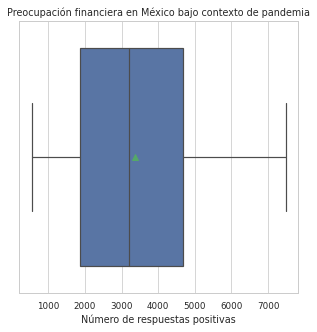

In [23]:
# 'Boxplot' sin filtro, es decir con datos atípicos:
sns.set(context = 'paper', style = 'whitegrid')
plt.figure(figsize = (5, 5))
plt.title('Preocupación financiera en México bajo contexto de pandemia')
sns.boxplot(x = df_1_financial_corcern['amount_of_positive_answers'], showmeans = True);
plt.xlabel('Número de respuestas positivas');
# ¡Nota que no hay datos atípicos!, por lo tanto no es necesario aplicar un filtro.

###### _2.1.2. Indicador `accept_vaccine`_

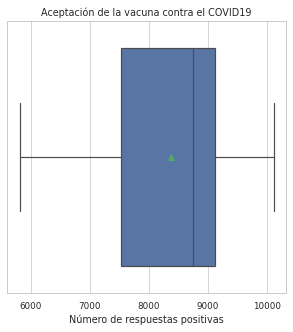

In [24]:
# 'Boxplot' sin filtro:
sns.set(context = 'paper', style = 'whitegrid')
plt.figure(figsize = (5, 5))
plt.title('Aceptación de la vacuna contra el COVID19')
sns.boxplot(x = df_2_accept_vaccine['amount_of_positive_answers'], showmeans = True);
plt.xlabel('Número de respuestas positivas'); # ¡Nuevamente no hay datos atípicos!

###### _2.1.3. Indicador `barrier_side_effects`_

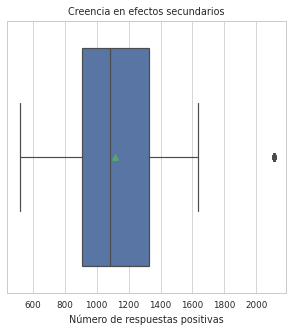

In [25]:
# 'Boxplot' sin filtro:
sns.set(context = 'paper', style = 'whitegrid')
plt.figure(figsize = (5, 5))
plt.title('Creencia en efectos secundarios')
sns.boxplot(x = df_3_barrier_side_effects['amount_of_positive_answers'], showmeans = True);
plt.xlabel('Número de respuestas positivas'); # Como aquí sí hay datos atípicos, se aplicará un filtro.

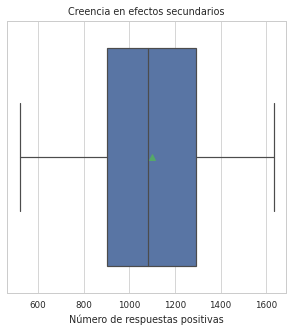

In [26]:
# 'Boxplot' con filtro:
iqr_03 = df_3_barrier_side_effects['amount_of_positive_answers'].quantile(0.75) - df_3_barrier_side_effects['amount_of_positive_answers'].quantile(0.25)
filtro_superior_03 = df_3_barrier_side_effects['amount_of_positive_answers'] < df_3_barrier_side_effects['amount_of_positive_answers'].quantile(.75) + (iqr_03 * 1.5)
filtro_inferior_03 = df_3_barrier_side_effects['amount_of_positive_answers'] > df_3_barrier_side_effects['amount_of_positive_answers'].quantile(.25) - (iqr_03 * 1.5)
df_3_barrier_side_effects_filtrado = df_3_barrier_side_effects[filtro_inferior_03 & filtro_superior_03]

sns.set(context = 'paper', style = 'whitegrid')
plt.figure(figsize = (5, 5))
plt.title('Creencia en efectos secundarios')
sns.boxplot(x = df_3_barrier_side_effects_filtrado['amount_of_positive_answers'], showmeans = True);
plt.xlabel('Número de respuestas positivas');

###### _2.1.4. Indicador `trust_WHO_recommendation`_

In [27]:
# En este caso, lo primero que se hará es obtener la variable 'amount_of_positive_answers':
df_2_trust_WHO_recommendation = df2_columnas_sin_indexar.iloc[:, [0, 2, 9, 10]]
amount_of_positive_answers = round(df_2_trust_WHO_recommendation.sample_size * df_2_trust_WHO_recommendation.indicator_percentage ).astype(int)
df_2_trust_WHO_recommendation.insert(4, 'amount_of_positive_answers', amount_of_positive_answers)
df_2_trust_WHO_recommendation.head(2)

,region_where_applied,survey_date_short,indicator_percentage,sample_size,amount_of_positive_answers
0,Aguascalientes,2020-12,0.768438,3152,2422
1,Aguascalientes,2020-12,0.753498,8364,6302


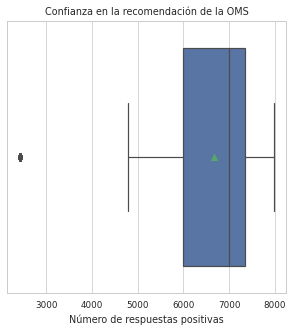

In [28]:
# 'Boxplot' sin filtro:
sns.set(context = 'paper', style = 'whitegrid')
plt.figure(figsize = (5, 5))
plt.title('Confianza en la recomendación de la OMS')
sns.boxplot(x = df_2_trust_WHO_recommendation['amount_of_positive_answers'], showmeans = True);
plt.xlabel('Número de respuestas positivas');

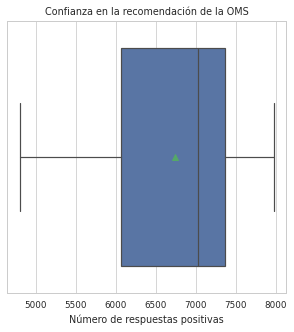

In [29]:
# 'Boxplot' con filtro:
iqr_04 = df_2_trust_WHO_recommendation['amount_of_positive_answers'].quantile(0.75) - df_2_trust_WHO_recommendation['amount_of_positive_answers'].quantile(0.25)
filtro_superior_04 = df_2_trust_WHO_recommendation['amount_of_positive_answers'] < df_2_trust_WHO_recommendation['amount_of_positive_answers'].quantile(.75) + (iqr_04 * 1.5)
filtro_inferior_04 = df_2_trust_WHO_recommendation['amount_of_positive_answers'] > df_2_trust_WHO_recommendation['amount_of_positive_answers'].quantile(.25) - (iqr_04 * 1.5)
df_2_trust_WHO_recommendation_filtrado = df_2_trust_WHO_recommendation[filtro_inferior_04 & filtro_superior_04]

sns.set(context = 'paper', style = 'whitegrid')
plt.figure(figsize = (5, 5))
plt.title('Confianza en la recomendación de la OMS')
sns.boxplot(x = df_2_trust_WHO_recommendation_filtrado['amount_of_positive_answers'], showmeans = True);
plt.xlabel('Número de respuestas positivas');

###### _2.1.5. Indicador `trust_government_recommendation`_

In [30]:
# En este caso, nuevamente hay que obtener la variable 'amount_of_positive_answers':
df_2_trust_government_recommendation = df2_columnas_sin_indexar.iloc[:, [0, 2, 11, 12]]
amount_of_positive_answers = df_2_trust_government_recommendation.sample_size * df_2_trust_government_recommendation.indicator_percentage 
df_2_trust_government_recommendation.insert(4, 'amount_of_positive_answers', amount_of_positive_answers)

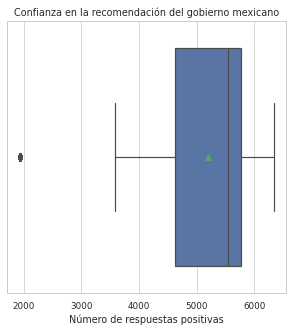

In [31]:
sns.set(context = 'paper', style = 'whitegrid')
plt.figure(figsize = (5, 5))
plt.title('Confianza en la recomendación del gobierno mexicano')
sns.boxplot(x = df_2_trust_government_recommendation['amount_of_positive_answers'], showmeans = True);
plt.xlabel('Número de respuestas positivas');

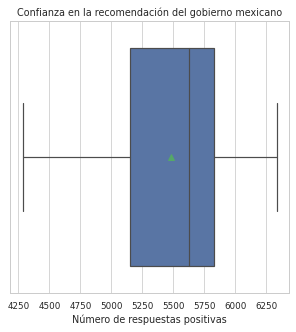

In [32]:
iqr_05 = df_2_trust_government_recommendation['amount_of_positive_answers'].quantile(0.75) - df_2_trust_government_recommendation['amount_of_positive_answers'].quantile(0.25)
filtro_superior_05 = df_2_trust_government_recommendation['amount_of_positive_answers'] < df_2_trust_WHO_recommendation['amount_of_positive_answers'].quantile(.75) + (iqr_05 * 1.5)
filtro_inferior_05 = df_2_trust_government_recommendation['amount_of_positive_answers'] > df_2_trust_WHO_recommendation['amount_of_positive_answers'].quantile(.25) - (iqr_05 * 1.5)
df_2_trust_government_recommendation_filtrado = df_2_trust_government_recommendation[filtro_inferior_05 & filtro_superior_05]

sns.set(context = 'paper', style = 'whitegrid')
plt.figure(figsize = (5, 5))
plt.title('Confianza en la recomendación del gobierno mexicano')
sns.boxplot(x = df_2_trust_government_recommendation_filtrado['amount_of_positive_answers'], showmeans = True);
plt.xlabel('Número de respuestas positivas');

#### _2.2. Generación de **tablas de frecuencia**_

###### _2.2.1. Indicador `financial_concern`_

In [33]:
num_filas_df_1_financial_corcern = len(df_1_financial_corcern['amount_of_positive_answers']) # Número de filas.
k_df_1_financial_corcern = math.ceil(math.log2(num_filas_df_1_financial_corcern)) # Número de divisiones.

# En estadística, la fórmula más aceptada para obtener el número de divisiones es: log_2(n),
# donde 'n' es el número de datos con los que se cuenta (o sea el número de filas).

# Ahora sí, se utilizan las funciones de 'pandas':
amount_of_positive_answers = df_1_financial_corcern['amount_of_positive_answers']
segmento_df_1_financial_corcern = pd.cut(amount_of_positive_answers, k_df_1_financial_corcern)
amount_of_positive_answers.groupby(segmento_df_1_financial_corcern).count()

amount_of_positive_answers
(546.077, 1085.538]      137
(1085.538, 1618.077]    1133
(1618.077, 2150.615]     999
(2150.615, 2683.154]     676
(2683.154, 3215.692]     653
(3215.692, 3748.231]     712
(3748.231, 4280.769]     283
(4280.769, 4813.308]     852
(4813.308, 5345.846]     442
(5345.846, 5878.385]     667
(5878.385, 6410.923]     480
(6410.923, 6943.462]       0
(6943.462, 7476.0]        31
Name: amount_of_positive_answers, dtype: int64

###### _2.2.2. Indicador `accept_vaccine`_

In [34]:
num_filas_df_2_accept_vaccine = len(df_2_accept_vaccine['amount_of_positive_answers']) # Número de filas.
k_df_2_accept_vaccine = math.ceil(math.log2(num_filas_df_2_accept_vaccine)) # Número de divisiones.

# Se utiliza 'pandas':
amount_of_positive_answers_02 = df_2_accept_vaccine['amount_of_positive_answers']
segmento_df_2_accept_vaccine = pd.cut(amount_of_positive_answers_02, k_df_2_accept_vaccine)
amount_of_positive_answers_02.groupby(segmento_df_2_accept_vaccine).count()

amount_of_positive_answers
(5808.704, 6203.545]     26
(6203.545, 6594.091]     26
(6594.091, 6984.636]     79
(6984.636, 7375.182]    215
(7375.182, 7765.727]    169
(7765.727, 8156.273]     58
(8156.273, 8546.818]    144
(8546.818, 8937.364]    323
(8937.364, 9327.909]    299
(9327.909, 9718.455]    211
(9718.455, 10109.0]      31
Name: amount_of_positive_answers, dtype: int64

###### _2.2.3. Indicador `barrier_side_effects`_

In [35]:
num_filas_df_3_barrier_side_effects = len(df_3_barrier_side_effects['amount_of_positive_answers']) # Número de filas.
k_df_3_barrier_side_effects = math.ceil(math.log2(num_filas_df_3_barrier_side_effects)) # Número de divisiones.

# Se utiliza 'pandas':
amount_of_positive_answers_03 = df_3_barrier_side_effects['amount_of_positive_answers']
segmento_df_3_barrier_side_effects = pd.cut(amount_of_positive_answers_03, k_df_3_barrier_side_effects)
amount_of_positive_answers_03.groupby(segmento_df_3_barrier_side_effects).count()

amount_of_positive_answers
(518.413, 664.273]       82
(664.273, 808.545]      132
(808.545, 952.818]      346
(952.818, 1097.091]     435
(1097.091, 1241.364]    301
(1241.364, 1385.636]    207
(1385.636, 1529.909]    266
(1529.909, 1674.182]     80
(1674.182, 1818.455]      0
(1818.455, 1962.727]      0
(1962.727, 2107.0]       31
Name: amount_of_positive_answers, dtype: int64

###### _2.2.4. Indicador `trust_WHO_recommendation`_

In [36]:
num_filas_df_2_trust_WHO_recommendation_filtrado = len(df_2_trust_WHO_recommendation_filtrado['amount_of_positive_answers']) # Número de filas.
k_df_2_trust_WHO_recommendation_filtrado = math.ceil(math.log2(num_filas_df_2_trust_WHO_recommendation_filtrado)) # Número de divisiones.

# Se utiliza 'pandas':
amount_of_positive_answers_04 = df_2_trust_WHO_recommendation_filtrado['amount_of_positive_answers']
segmento_df_2_trust_WHO_recommendation_filtrado = pd.cut(amount_of_positive_answers_04, k_df_2_trust_WHO_recommendation_filtrado)
amount_of_positive_answers_04.groupby(segmento_df_2_trust_WHO_recommendation_filtrado).count()

amount_of_positive_answers
(4794.824, 5086.727]     26
(5086.727, 5375.455]     53
(5375.455, 5664.182]    161
(5664.182, 5952.909]    106
(5952.909, 6241.636]     83
(6241.636, 6530.364]    115
(6530.364, 6819.091]    174
(6819.091, 7107.818]    174
(7107.818, 7396.545]    299
(7396.545, 7685.273]    239
(7685.273, 7974.0]      122
Name: amount_of_positive_answers, dtype: int64

###### _2.2.5. Indicador `trust_government_recommendation`_

In [37]:
num_filas_df_2_trust_government_recommendation_filtrado = len(df_2_trust_government_recommendation_filtrado['amount_of_positive_answers']) # Número de filas.
k_df_2_trust_government_recommendation_filtrado = math.ceil(math.log2(num_filas_df_2_trust_government_recommendation_filtrado)) # Número de divisiones.

# Se utiliza 'pandas':
amount_of_positive_answers_05 = df_2_trust_government_recommendation_filtrado['amount_of_positive_answers']
segmento_df_2_trust_government_recommendation_filtrado = pd.cut(amount_of_positive_answers_05, k_df_2_trust_government_recommendation_filtrado)
amount_of_positive_answers_05.groupby(segmento_df_2_trust_government_recommendation_filtrado).count()

amount_of_positive_answers
(4285.709, 4473.69]      54
(4473.69, 4659.626]      80
(4659.626, 4845.562]     83
(4845.562, 5031.497]     88
(5031.497, 5217.433]     58
(5217.433, 5403.368]     57
(5403.368, 5589.304]    177
(5589.304, 5775.24]     354
(5775.24, 5961.175]     151
(5961.175, 6147.111]    180
(6147.111, 6333.046]     30
Name: amount_of_positive_answers, dtype: int64

#### _2.3. Generación de **histogramas**_

###### _2.3.1. Indicador `trust_WHO_recommendation`_

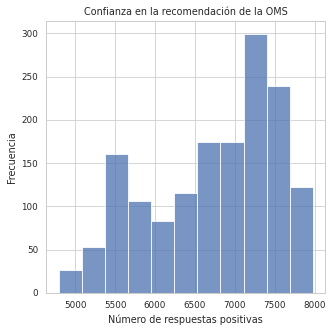

In [38]:
plt.figure(figsize = (5, 5))
plt.title('Confianza en la recomendación de la OMS')
sns.histplot(data = df_2_trust_WHO_recommendation_filtrado, x = 'amount_of_positive_answers', bins = 11);
plt.xlabel('Número de respuestas positivas')
plt.ylabel('Frecuencia'); # Nótese que este histograma se graficó a partir de datos filtrados, es decir sin valores atípicos.

###### _2.3.2. Indicador `trust_government_recommendation`_

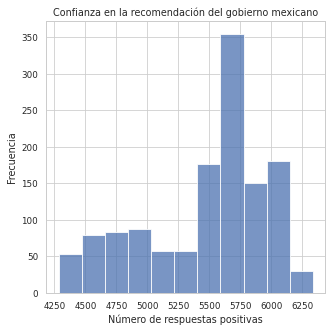

In [39]:
plt.figure(figsize = (5, 5))
plt.title('Confianza en la recomendación del gobierno mexicano')
sns.histplot(data = df_2_trust_government_recommendation_filtrado, x = 'amount_of_positive_answers', bins = 11);
plt.xlabel('Número de respuestas positivas')
plt.ylabel('Frecuencia'); # Histograma hecho a partir de datos sin valores atípicos.

#### _2.4. Generación de **gráficas de densidad**_

###### _2.4.1. Indicador `financial_concern`_

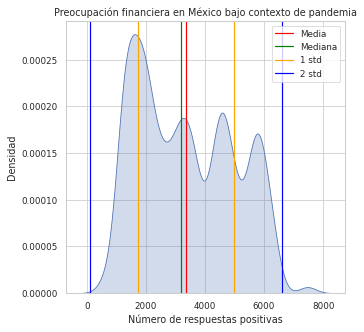

In [40]:
plt.figure(figsize = (5, 5))
plt.title('Preocupación financiera en México bajo contexto de pandemia')
sns.kdeplot(x = df_1_financial_corcern['amount_of_positive_answers'], fill = True);
plt.xlabel('Número de respuestas positivas')
plt.ylabel('Densidad');
plt.axvline(x = media, color = 'red', label = 'Media');
plt.axvline(x = mediana, color = 'green', label = 'Mediana');
plt.axvline(x = media + std_fc, color = 'orange', label = '1 std');
plt.axvline(x = media-std_fc, color = 'orange')
plt.axvline(x = media + (2 * std_fc), color = 'blue', label = '2 std');
plt.axvline(x = media - (2 * std_fc), color = 'blue')
plt.legend();

In [41]:
print(f"Curtosis: {kurtosis(df_1_financial_corcern['amount_of_positive_answers'])}")
print(f"Asimetría: {skew(df_1_financial_corcern['amount_of_positive_answers'])}")

Curtosis: -1.1521651754050717
Asimetría: 0.27666916555308685


###### _2.4.2. Indicador `accept_vaccine`_

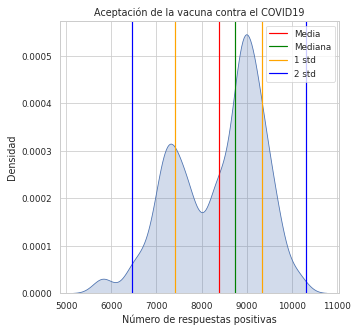

In [42]:
plt.figure(figsize = (5, 5))
plt.title('Aceptación de la vacuna contra el COVID19')
sns.kdeplot(x = df_2_accept_vaccine['amount_of_positive_answers'], fill = True);
plt.xlabel('Número de respuestas positivas')
plt.ylabel('Densidad');
plt.axvline(x = media_02, color = 'red', label = 'Media');
plt.axvline(x = mediana_02, color = 'green', label = 'Mediana');
plt.axvline(x = media_02 + std_02, color = 'orange', label = '1 std');
plt.axvline(x = media_02 - std_02, color = 'orange')
plt.axvline(x = media_02 + (2 * std_02), color = 'blue', label = '2 std');
plt.axvline(x = media_02 - (2 * std_02), color = 'blue')
plt.legend();

In [43]:
print(f"Curtosis: {kurtosis(df_2_accept_vaccine['amount_of_positive_answers'])}")
print(f"Asimetría: {skew(df_2_accept_vaccine['amount_of_positive_answers'])}")

Curtosis: -0.630408242441308
Asimetría: -0.5006423194720571


###### _2.4.3. Indicador `barrier_side_effects`_

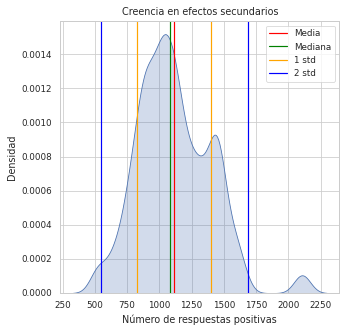

In [44]:
plt.figure(figsize = (5, 5))
plt.title('Creencia en efectos secundarios')
sns.kdeplot(x = df_3_barrier_side_effects['amount_of_positive_answers'], fill = True);
plt.xlabel('Número de respuestas positivas')
plt.ylabel('Densidad');
plt.axvline(x = media_03, color = 'red', label = 'Media');
plt.axvline(x = mediana_03, color = 'green', label = 'Mediana');
plt.axvline(x = media_03 + std_03, color = 'orange', label = '1 std');
plt.axvline(x = media_03 - std_03, color = 'orange')
plt.axvline(x = media_03 + (2 * std_03), color = 'blue', label = '2 std');
plt.axvline(x = media_03 - (2 * std_03), color = 'blue')
plt.legend();

In [45]:
print(f"Curtosis: {kurtosis(df_3_barrier_side_effects['amount_of_positive_answers'])}")
print(f"Asimetría: {skew(df_3_barrier_side_effects['amount_of_positive_answers'])}")

Curtosis: 0.929679895567018
Asimetría: 0.6191023603883478


## _**Sesión 3:** Exploración de variables categóricas y análisis multivariable_

#### _3.1. Creación de la variable categórica `covid_19`_

In [46]:
df_1_covid_19 = df1_columnas_sin_indexar.iloc[:, [0, 2, 3, 4]]
amount_of_positive_answers = df_1_covid_19.sample_size * df_1_covid_19.indicator_percentage 
df_1_covid_19.insert(4, 'amount_of_positive_answers', amount_of_positive_answers)

valores = [0, 0.0125, 0.025, 0.375, math.inf] # Límites o umbrales establecidos para crear las distintas categorías.
categorias = ['Low', 'Normal', 'High', 'Very high'] # Categorías en las que se dividirá la nueva variable categórica.
                                                    # Nota que esta categorización hace referencia a la tasa de contagio que
                                                    # tiene, por día, cada estado de la República Mexicana.
contagion_rate = pd.cut(x = df_1_covid_19['indicator_percentage'], bins = valores, labels = categorias)
df_1_covid_19_02 = df_1_covid_19.copy()
df_1_covid_19_02.insert(4, 'contagion_rate', contagion_rate)
df_1_covid_19_categorico = df_1_covid_19_02.copy()
del(df_1_covid_19_categorico['indicator_percentage'])
df_1_covid_19_categorico.head(6)

,region_where_applied,survey_date_short,sample_size,contagion_rate,amount_of_positive_answers
0,Aguascalientes,2020-11,8453,Normal,195.712309
1,Aguascalientes,2020-11,9490,Normal,190.749000
2,Aguascalientes,2020-11,9540,High,238.977000
3,Aguascalientes,2020-11,9315,High,241.780140
4,Aguascalientes,2020-11,9430,Normal,209.874080
5,Aguascalientes,2020-11,9408,Normal,203.692608


#### _3.2. Creación de las variables categoricas `region_where_applied` y `survey_date_short`_

In [47]:
df_1_covid_19_categorico['region_where_applied'].astype('category')
df_1_covid_19_categorico['survey_date_short'].astype('category');

#### _3.3. **Gráficas de barras**_

###### _3.3.1. Indicador `covid_19`_

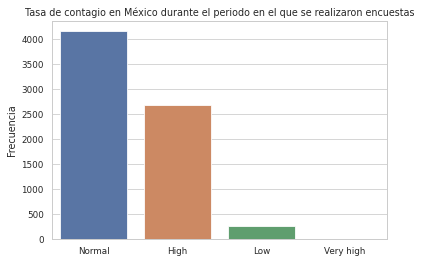

In [48]:
counts_covid_19 = df_1_covid_19_categorico['contagion_rate'].value_counts() # Conteo por categoría.

ax = sns.barplot(x = counts_covid_19.index, y = counts_covid_19, order = counts_covid_19.index)
ax.set_title('Tasa de contagio en México durante el periodo en el que se realizaron encuestas')
ax.set(ylabel='Frecuencia');

###### _3.3.2. Indicador `region_where_applied`_

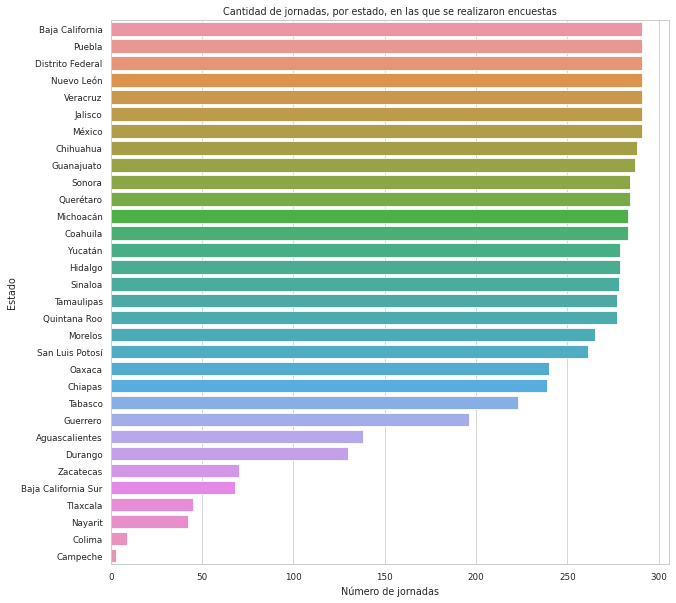

In [49]:
counts_region_where_applied=df_1_covid_19_categorico['region_where_applied'].value_counts() # Conteo por categoría.

plt.figure(figsize = (10, 10))
ax= sns.barplot(y = counts_region_where_applied.index, x = counts_region_where_applied, order = counts_region_where_applied.index)
ax.set_title('Cantidad de jornadas, por estado, en las que se realizaron encuestas');
ax.set(ylabel = 'Estado', xlabel = 'Número de jornadas');

###### _3.3.3. Indicador `survey_date_short`_

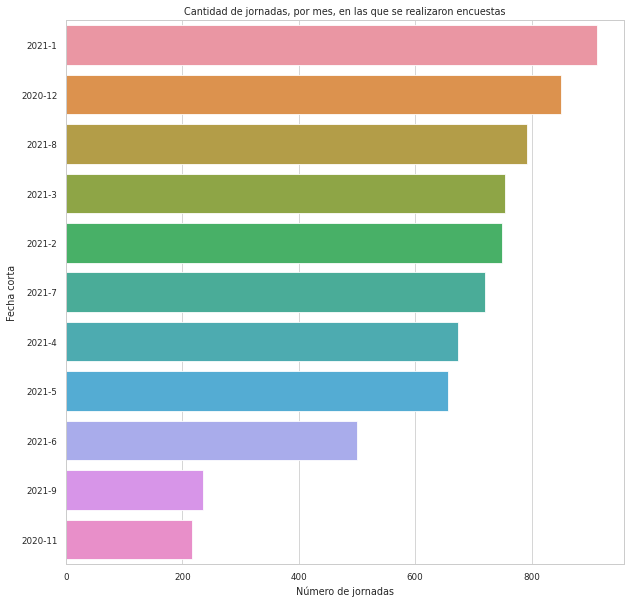

In [50]:
counts_survey_date_short=df_1_covid_19_categorico['survey_date_short'].value_counts() # Conteo por categoría.

plt.figure(figsize = (10, 10))
ax = sns.barplot(y = counts_survey_date_short.index, x = counts_survey_date_short, order = counts_survey_date_short.index)
ax.set_title('Cantidad de jornadas, por mes, en las que se realizaron encuestas');
ax.set(ylabel = 'Fecha corta', xlabel = 'Número de jornadas');

#### _3.4. **Tabla de contingencia**_

In [51]:
crosstab = pd.crosstab(df_1_covid_19_categorico['region_where_applied'], [df_1_covid_19_categorico['contagion_rate'],
                                                                          df_1_covid_19_categorico['survey_date_short']])
crosstab = crosstab.stack(0)
crosstab = crosstab.fillna(0)
crosstab = crosstab.astype(int)
crosstab

survey_date_short                    2020-11  2020-12  ...  2021-8  2021-9
region_where_applied contagion_rate                    ...                
Aguascalientes       Low                   0        0  ...       0       0
                     Normal                6       24  ...       0       0
                     High                  2        7  ...      14       0
Baja California      Low                   0        0  ...       0       0
                     Normal                6       24  ...       0       0
...                                      ...      ...  ...     ...     ...
Yucatán              Normal                6       22  ...       0       0
                     High                  2        7  ...      30      10
Zacatecas            Low                   0        0  ...       0       0
                     Normal                6       22  ...       0       0
                     High                  2        6  ...       3       0

[96 rows x 11 columns]

#### _3.5. **Boxplots y Violinplots**_

###### _3.5.1. Boxplots_

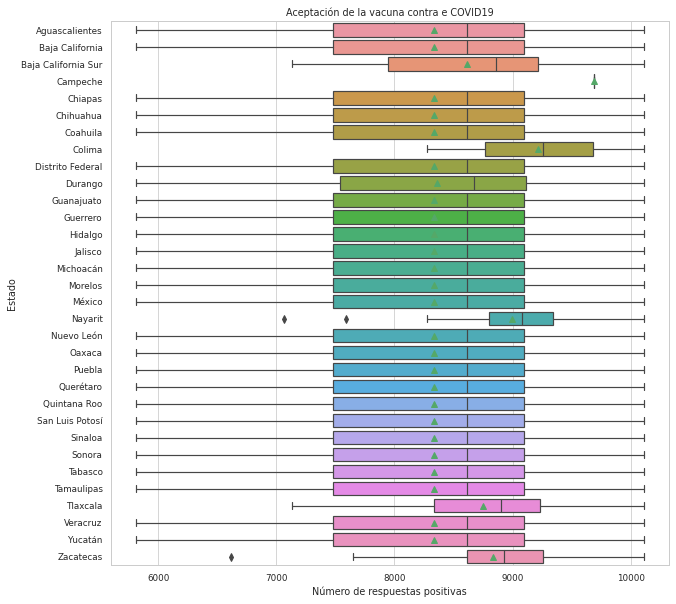

In [52]:
df_2_accept_vaccine['region_where_applied'].astype('category')

sns.set(context = 'paper', style = 'whitegrid')
plt.figure(figsize = (10, 10))
plt.title('Aceptación de la vacuna contra e COVID19')
sns.boxplot(x = df_2_accept_vaccine['amount_of_positive_answers'], y = df_2_accept_vaccine['region_where_applied'], showmeans = True);
plt.xlabel('Número de respuestas positivas');
plt.ylabel('Estado'); # Nótese que en algunos estados hay valores potencialmente atípicos.

###### _3.5.2. Violinplots_

<Figure size 2160x2160 with 0 Axes>

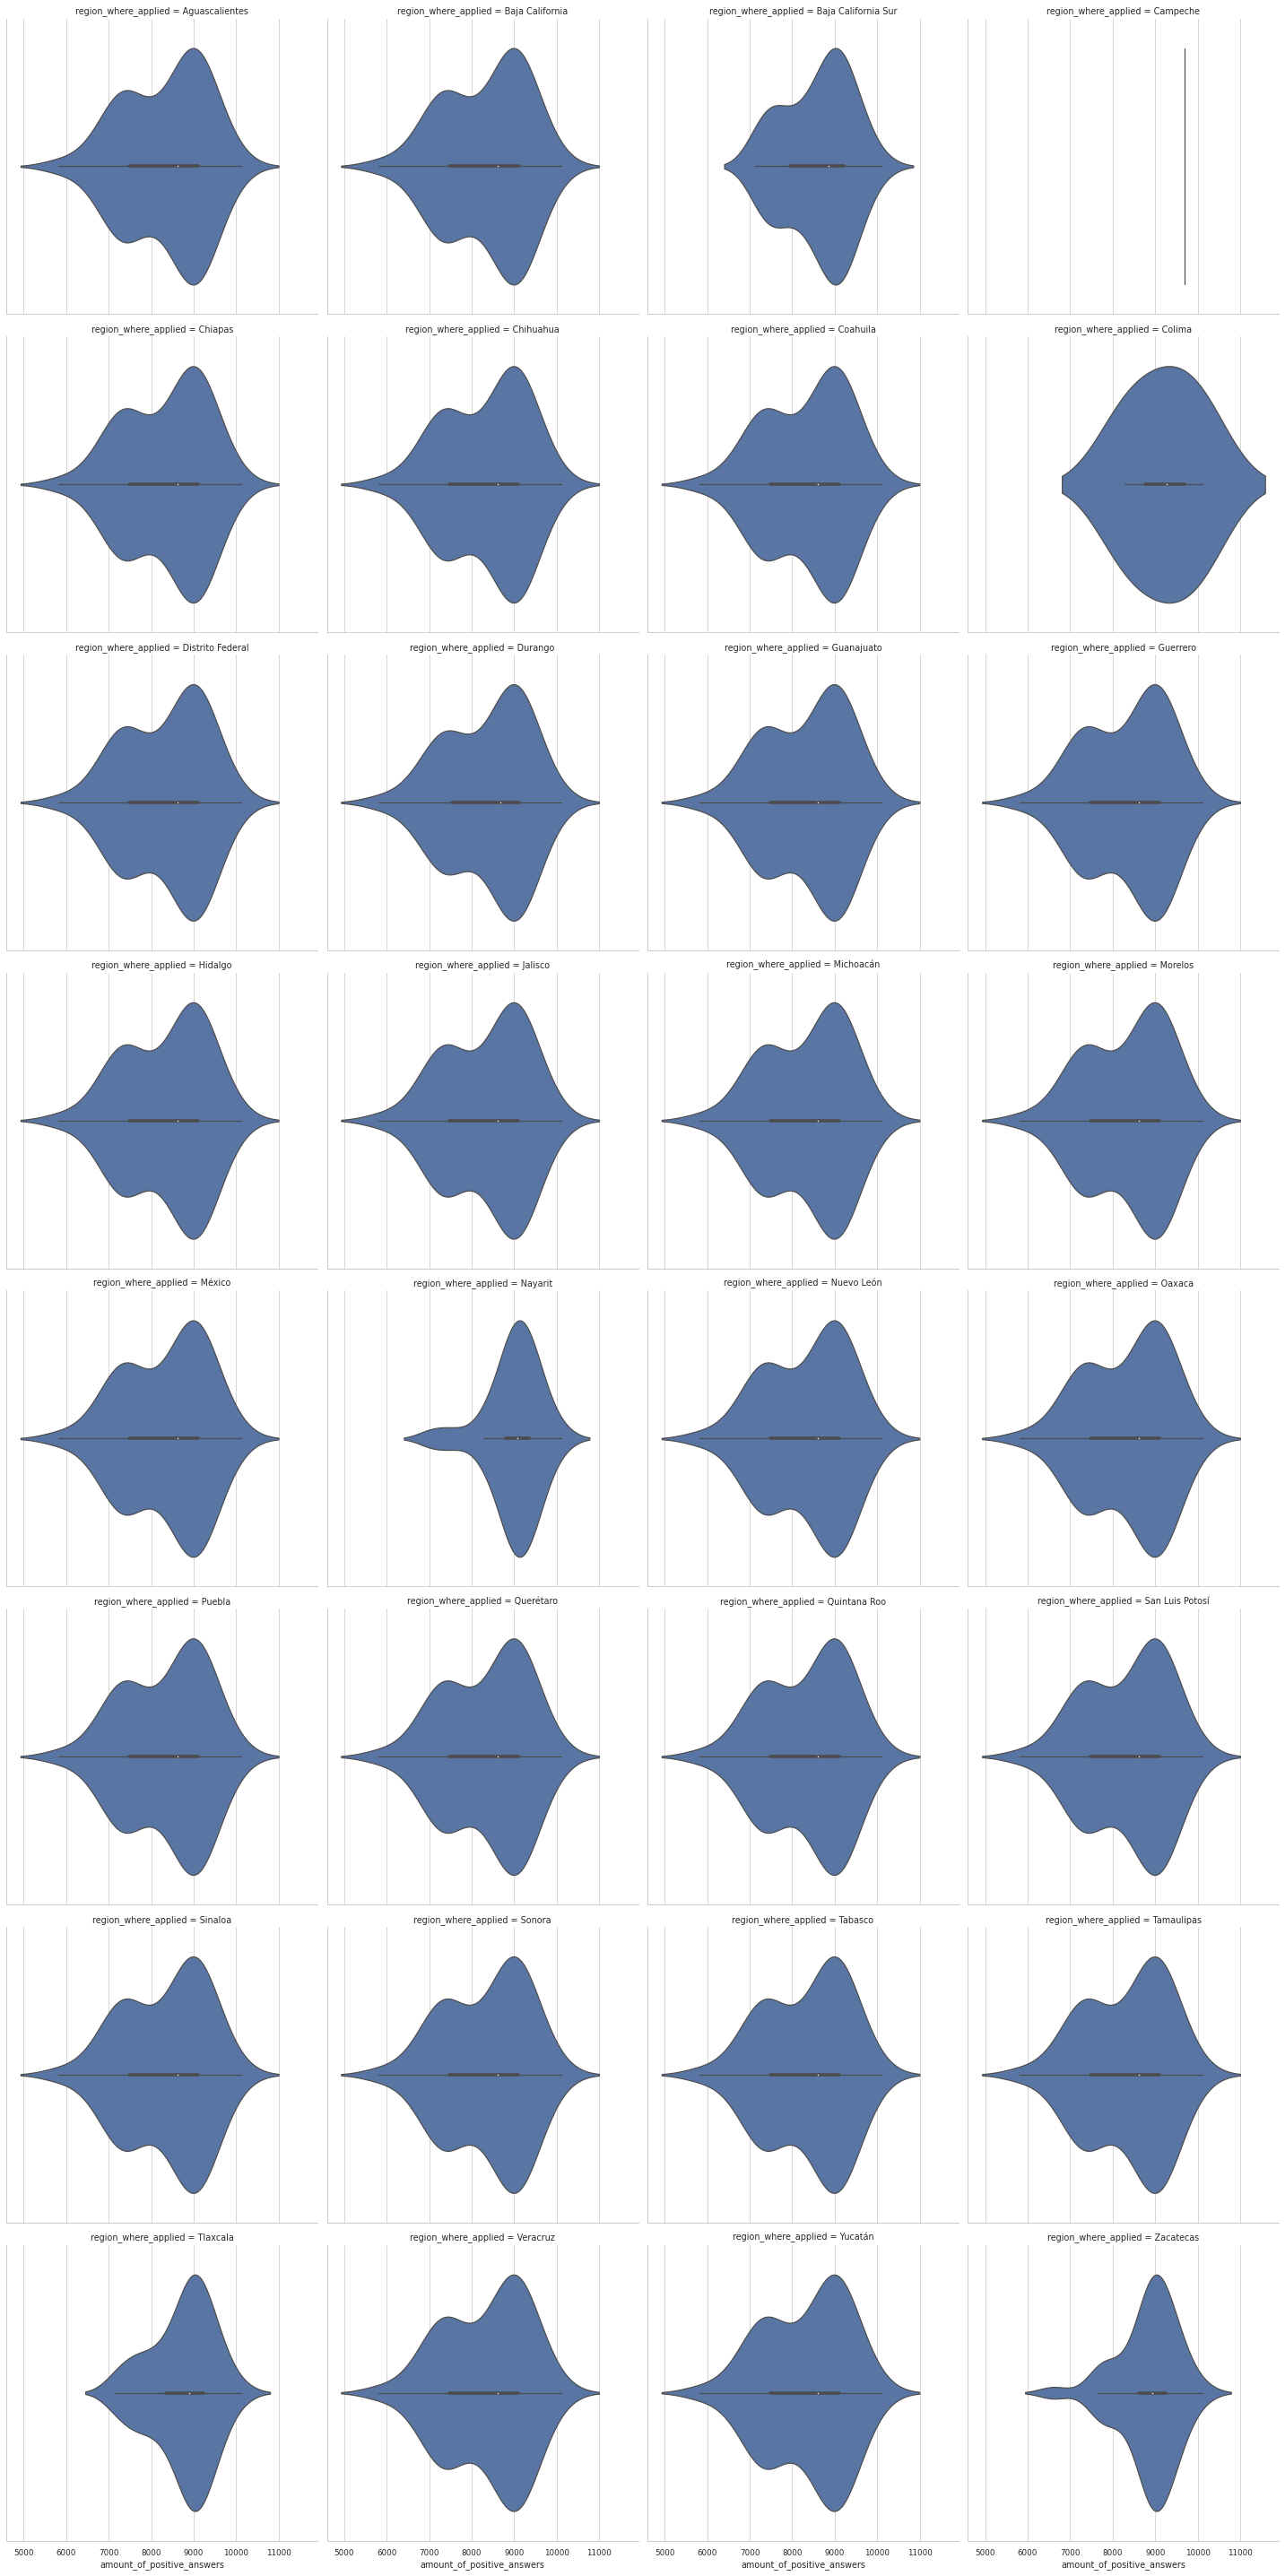

In [53]:
plt.figure(figsize = (30, 30));
sns.catplot(col = 'region_where_applied', x = 'amount_of_positive_answers', col_wrap = 4, 
            kind = 'violin', data = df_2_accept_vaccine[df_2_accept_vaccine.region_where_applied.notnull()],);

## _**Sesión 4:** Correlaciones y Regresión linear simple_

#### _4.1. Generación de **tablas de correlación**_

###### _**DataFrame 1**_

In [54]:
# Lo primero que debemos hacer es limipiar el df_1 para obtener solo las columnas de indicator_percentage y ponerle los nombres adecuados
df_1_only_indicator_percentage=df1_columnas_sin_indexar.iloc[:,[3,5,7]]
df_1_only_indicator_percentage.columns=['covid_19','wear_a_mask','financial_concern']
df_1_only_indicator_percentage.head(2)

,covid_19,wear_a_mask,financial_concern
0,0.023153,0.899553,0.630136
1,0.020100,0.901764,0.619214


In [55]:
# Ahora sí podemos proceder a hacer la tabla de correlación
df_1_only_indicator_percentage.corr()

,covid_19,wear_a_mask,financial_concern
covid_19,1.000000,-0.694354,-0.057203
wear_a_mask,-0.694354,1.000000,0.344602
financial_concern,-0.057203,0.344602,1.000000


###### _**DataFrame 2**_

In [56]:
# Lo primero que debemos hacer es limipiar el df_2 para obtener solo las columnas de indicator_percentage y ponerle los nombres adecuados
df_2_only_indicator_percentage=df2_columnas_sin_indexar.iloc[:,[3,5,7,9,11]]
df_2_only_indicator_percentage.columns=['accept_vaccine','trust_family_recommendation','trust_healthcare_recommendation','trust_WHO_recommendation','trust_government_recommendation']
df_2_only_indicator_percentage.head(2)

,accept_vaccine,trust_family_recommendation,trust_healthcare_recommendation,trust_WHO_recommendation,trust_government_recommendation
0,0.827023,0.644872,0.721161,0.768438,0.657455
1,0.820356,0.653233,0.705194,0.753498,0.644496


In [57]:
# Ahora sí podemos proceder a hacer la tabla de correlación
df_2_only_indicator_percentage.corr()

,accept_vaccine,trust_family_recommendation,trust_healthcare_recommendation,trust_WHO_recommendation,trust_government_recommendation
accept_vaccine,1.000000,-0.871745,-0.709677,0.639071,-0.530406
trust_family_recommendation,-0.871745,1.000000,0.897975,-0.507564,0.757195
trust_healthcare_recommendation,-0.709677,0.897975,1.000000,-0.375193,0.797321
trust_WHO_recommendation,0.639071,-0.507564,-0.375193,1.000000,0.057234
trust_government_recommendation,-0.530406,0.757195,0.797321,0.057234,1.000000


###### _**DataFrame 3**_

In [58]:
 # Aqui tenemos que aplicar más filtros ya que aún no tenemos un df3_con_columnas_sin_indexar
 df3.head(2) #Revisamos de manera inicial el df

survey_information              ... barrier_dont_trust_government            
  region_where_applied survey_date  ...          indicator_percentage sample_size
0       Aguascalientes  2021-02-06  ...                           0.0        2551
1       Aguascalientes  2021-02-07  ...                           0.0        2437

[2 rows x 19 columns]

In [59]:
# Creamos un df3_con_columnas_sin_indexar 
df3_columnas_sin_indexar=df3.copy() 
df3_columnas_sin_indexar.columns=df3_columnas_sin_indexar.columns.droplevel(0)
df3_columnas_sin_indexar.head(2) 

,region_where_applied,survey_date,survey_date_short,indicator_percentage,sample_size,indicator_percentage,sample_size,indicator_percentage,sample_size,indicator_percentage,sample_size,indicator_percentage,sample_size,indicator_percentage,sample_size,indicator_percentage,sample_size,indicator_percentage,sample_size
0,Aguascalientes,2021-02-06,2021-2,0.018895,8164,0.123849,196,0.573751,2551,0.139143,116,0.244192,116,0.050306,2551,0.054113,2551,0.0,2551
1,Aguascalientes,2021-02-07,2021-2,0.022152,8249,0.154368,202,0.570975,2437,0.205662,106,0.132152,106,0.049256,2437,0.067466,2437,0.0,2437


In [60]:
# Aplicamos el último filtro
df_3_only_indicator_percentage=df3_columnas_sin_indexar.iloc[:,[3,5,7,9,11,13,15,17]]
df_3_only_indicator_percentage.columns=['partially_vaccinated','fully_vaccinated','barrier_side_effects','barrier_dont_need_already_had','barrier_dont_need_not_beneficial','barrier_dont_believe','barrier_dont_like_vaccines','barrier_dont_trust_government']
df_3_only_indicator_percentage.head(2)

,partially_vaccinated,fully_vaccinated,barrier_side_effects,barrier_dont_need_already_had,barrier_dont_need_not_beneficial,barrier_dont_believe,barrier_dont_like_vaccines,barrier_dont_trust_government
0,0.018895,0.123849,0.573751,0.139143,0.244192,0.050306,0.054113,0.0
1,0.022152,0.154368,0.570975,0.205662,0.132152,0.049256,0.067466,0.0


In [61]:
# Ahora sí podemos proceder a hacer la tabla de correlación
df_3_only_indicator_percentage.corr()

,partially_vaccinated,fully_vaccinated,barrier_side_effects,barrier_dont_need_already_had,barrier_dont_need_not_beneficial,barrier_dont_believe,barrier_dont_like_vaccines,barrier_dont_trust_government
partially_vaccinated,1.000000,0.259442,-0.494689,0.132424,0.085653,0.823164,0.621267,0.725321
fully_vaccinated,0.259442,1.000000,-0.380941,0.166472,0.107641,0.389289,0.281718,0.090501
barrier_side_effects,-0.494689,-0.380941,1.000000,-0.097202,-0.171477,-0.421632,-0.363373,-0.446411
barrier_dont_need_already_had,0.132424,0.166472,-0.097202,1.000000,-0.100061,0.044873,0.042273,0.101761
barrier_dont_need_not_beneficial,0.085653,0.107641,-0.171477,-0.100061,1.000000,0.053993,0.206266,0.187503
barrier_dont_believe,0.823164,0.389289,-0.421632,0.044873,0.053993,1.000000,0.651086,0.643968
barrier_dont_like_vaccines,0.621267,0.281718,-0.363373,0.042273,0.206266,0.651086,1.000000,0.626711
barrier_dont_trust_government,0.725321,0.090501,-0.446411,0.101761,0.187503,0.643968,0.626711,1.000000


#### _4.2. Generación de **mapas de calor**_

###### _**DataFrame 1**_

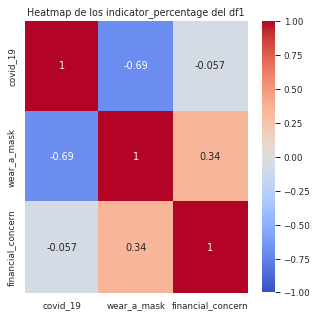

In [62]:
plt.figure(figsize=(5,5))
plt.title('Heatmap de los indicator_percentage del df1');
sns.heatmap(df_1_only_indicator_percentage.corr(),vmin=-1,vmax=1,annot=True,cmap='coolwarm');

###### _**DataFrame 2**_

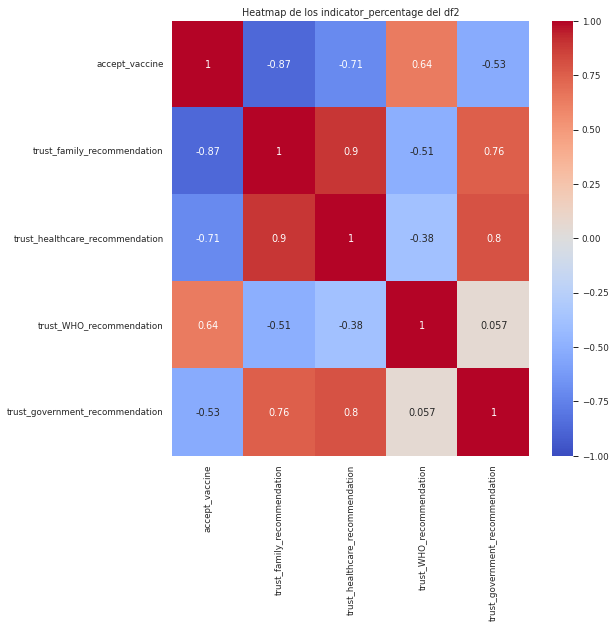

In [63]:
plt.figure(figsize=(8,8))
plt.title('Heatmap de los indicator_percentage del df2');
sns.heatmap(df_2_only_indicator_percentage.corr(),vmin=-1,vmax=1,annot=True,cmap='coolwarm');

###### _**DataFrame 3**_

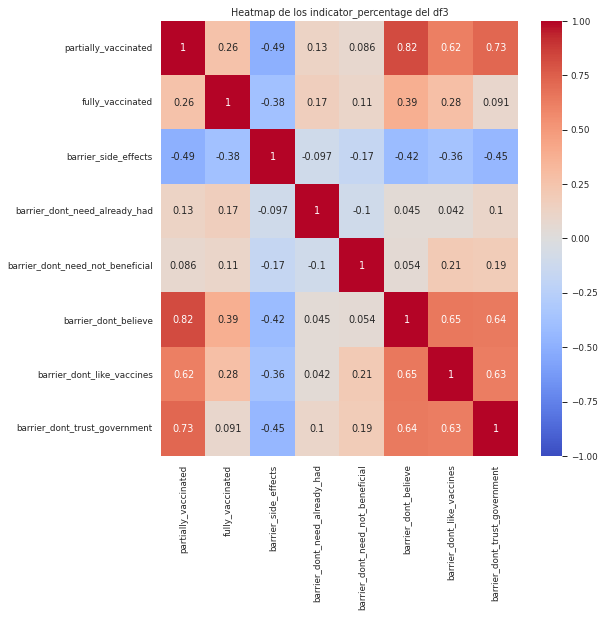

In [64]:
plt.figure(figsize=(8,8))
plt.title('Heatmap de los indicator_percentage del df3');
sns.heatmap(df_3_only_indicator_percentage.corr(),vmin=-1,vmax=1,annot=True,cmap='coolwarm');

#### _4.3. Generación de **pairplots**_

In [65]:
# Lo primero que vamos a hacer es crear un filtro para dejar fuera las columnas de partially_vaccinated y fully_vaccinated
df_3_only_indicator_percentage_filtered=df_3_only_indicator_percentage.iloc[:,[2,3,4,5,6,7]]
df_3_only_indicator_percentage_filtered.head(2)

,barrier_side_effects,barrier_dont_need_already_had,barrier_dont_need_not_beneficial,barrier_dont_believe,barrier_dont_like_vaccines,barrier_dont_trust_government
0,0.573751,0.139143,0.244192,0.050306,0.054113,0.0
1,0.570975,0.205662,0.132152,0.049256,0.067466,0.0


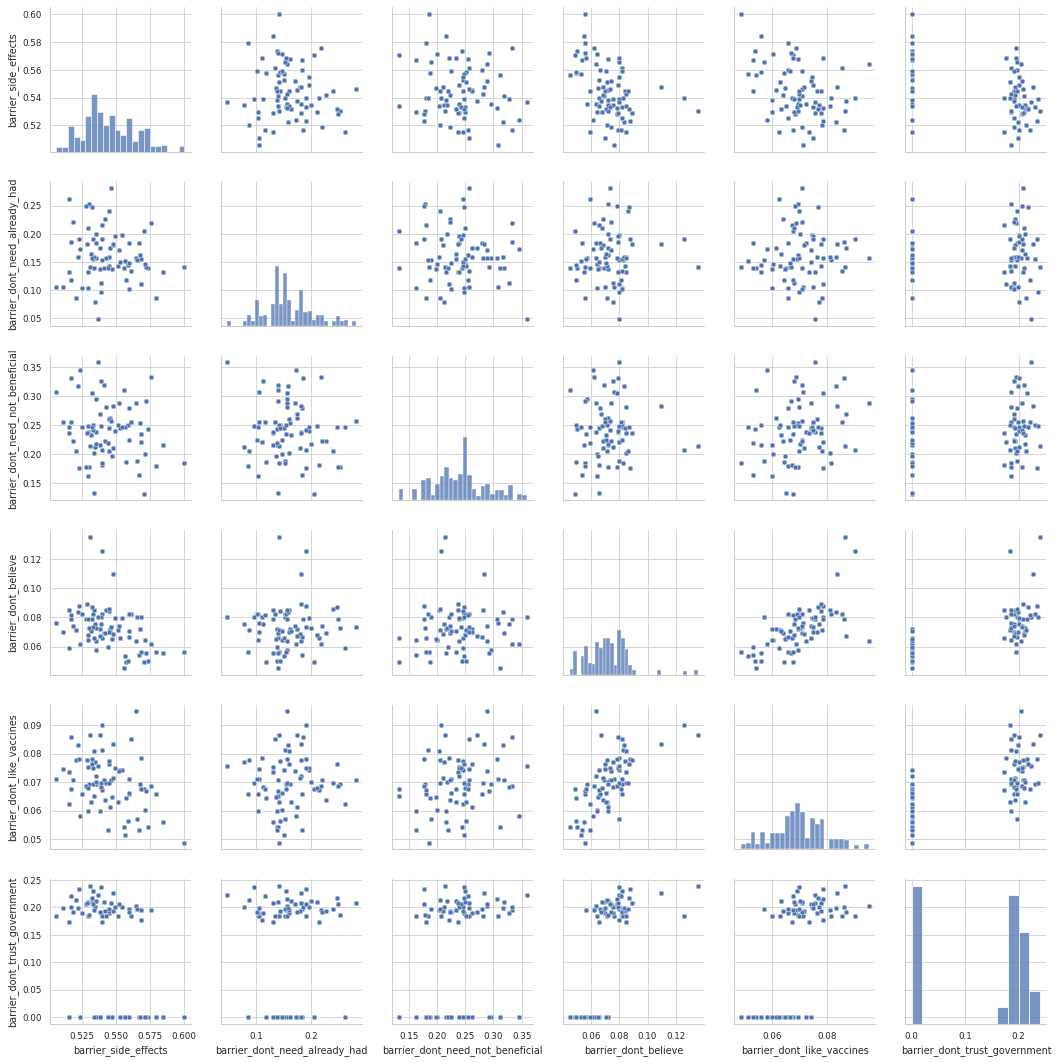

In [66]:
# Generamos el pairplot
sns.pairplot(data=df_3_only_indicator_percentage_filtered);

#### _4.4. Generación de **scatterplots**_

###### _4.4.1. Gráfico de dispersión con los indicadores `financial_concern` y `covid_19`_

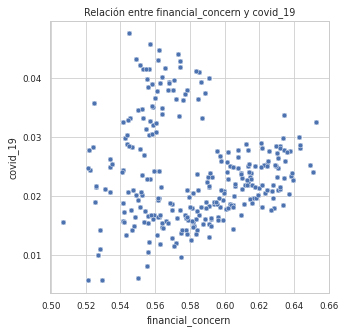

In [67]:
plt.figure(figsize=(5,5))
plt.title('Relación entre financial_concern y covid_19')
sns.scatterplot(x=df_1_only_indicator_percentage['financial_concern'],y=df_1_only_indicator_percentage['covid_19']); 

###### _4.4.2. Gráfico de dispersión con los indicadores `wear_a_mask` y `covid_19`_

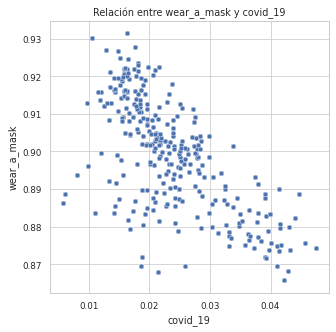

In [68]:
plt.figure(figsize=(5,5))
plt.title('Relación entre wear_a_mask y covid_19')
sns.scatterplot(x=df_1_only_indicator_percentage['covid_19'],y=df_1_only_indicator_percentage['wear_a_mask']); # Ojo aqui ya que al usar mascara se contagiaron menos.

###### _4.4.3. Gráfico de dispersión con los indicadores `trust_WHO_recommendation` y `accept_vaccine`_

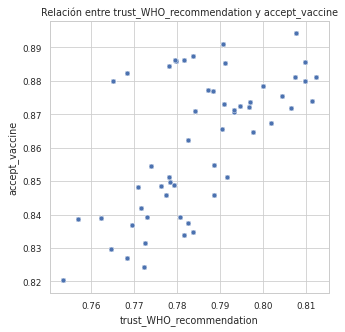

In [69]:
plt.figure(figsize=(5,5))
plt.title('Relación entre trust_WHO_recommendation y accept_vaccine')
sns.scatterplot(x=df_2_only_indicator_percentage['trust_WHO_recommendation'],y=df_2_only_indicator_percentage['accept_vaccine']);

###### _4.4.4. Gráfico de dispersión con los indicadores `trust_family_recommendation` y `accept_vaccine`_

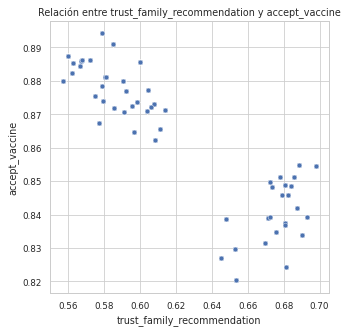

In [70]:
plt.figure(figsize=(5,5))
plt.title('Relación entre trust_family_recommendation y accept_vaccine')
sns.scatterplot(x=df_2_only_indicator_percentage['trust_family_recommendation'],y=df_2_only_indicator_percentage['accept_vaccine']);

###### _4.4.5. Gráfico de dispersión con los indicadores `barrier_dont_believe` y `barrier_dont_like_vaccines`_

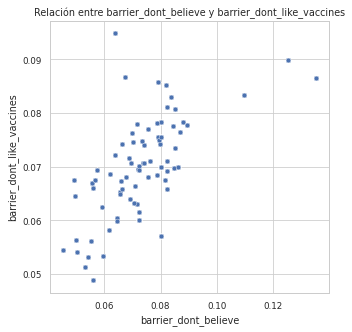

In [71]:
plt.figure(figsize=(5,5))
plt.title('Relación entre barrier_dont_believe y barrier_dont_like_vaccines')
sns.scatterplot(x=df_3_only_indicator_percentage['barrier_dont_believe'],y=df_3_only_indicator_percentage['barrier_dont_like_vaccines']);

###### _4.4.6. Gráfico de dispersión con los indicadores `barrier_dont_believe` y `barrier_side_effects`_

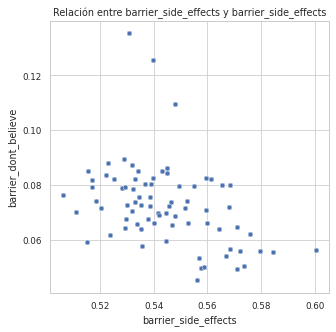

In [72]:
plt.figure(figsize=(5,5))
plt.title('Relación entre barrier_side_effects y barrier_side_effects')
sns.scatterplot(x=df_3_only_indicator_percentage['barrier_side_effects'],y=df_3_only_indicator_percentage['barrier_dont_believe']);

> **Observaciones:**
>
> - Existe una correlación negativa entre el uso de cubrebocas y el contagio de la enfermedad, algo que a simple vista es evidente, sin emabrgo hay muchas personas escepticas de esto todavía, por lo que con el análisis anterior no debe quedar duda.
- Otra cosa interesante es que entre más se cree en las recomendaciones la OMS es más probable que se acepte la vacuna, por el contrario entre más se cree en las recomendaciones de la familia menos se acepta la vacuna, algo realmente curioso a lo que se le debe poner atención, ya que los propios familiares podrian causar que no se acepte la vacuna.
- Una correlación que es sorpredente es que cuando a las personas no les gusta vacunarse, suelen no creer en el covid-19, por lo que quiza si se les pudiera ayudar con este miedo, empezarían a creer más.

#### _4.5. Generación de una **regresión lineal simple**_

El score en esta regresión lineal es de: 0.4821280303825061


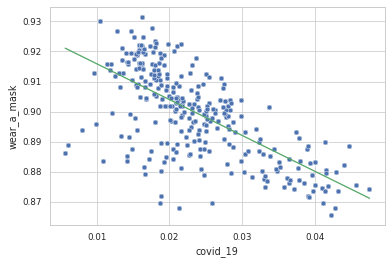

In [73]:
# Primero instaciamos el objeto
linear_regression=LinearRegression()
#Fit
linear_regression.fit(df_1_only_indicator_percentage['covid_19'].to_frame(),df_1_only_indicator_percentage['wear_a_mask'])
y_predict_01=linear_regression.predict(df_1_only_indicator_percentage['covid_19'].to_frame())
# Creación del plot con su calificación
sns.scatterplot(x=df_1_only_indicator_percentage['covid_19'],y=df_1_only_indicator_percentage['wear_a_mask'])
sns.lineplot(x=df_1_only_indicator_percentage['covid_19'],y=y_predict_01, color='g');
score_01=linear_regression.score(df_1_only_indicator_percentage['covid_19'].to_frame(),df_1_only_indicator_percentage['wear_a_mask'])
print(f'El score en esta regresión lineal es de: {score_01}')

#### _4.6. Generación de una **regresión lineal multivariable**_

In [74]:
# Primero definimos las variables con las que vamos a trabajar
X= df_2_only_indicator_percentage[['trust_healthcare_recommendation','trust_government_recommendation', 'trust_family_recommendation']]
y= df_2_only_indicator_percentage['accept_vaccine']
# Dividimos los conjuntos para entrenamiento
X_training, X_test, y_training, y_test=train_test_split(X,y,test_size=.3,shuffle=True)
# Intanciamos el objeto
lr=LinearRegression()
# Hacemos el fit
lr.fit(X_training,y_training)
# Obtenemos la califación, ojo aqui no se hace un plot por razones evidentes
score_02=lr.score(X_test,y_test)
print(f'La calificación en esta regresión es de: {score_02}')

La calificación en esta regresión es de: 0.8062089023345431


## _**Sesión 5:** Distribuciones muestrales y Técnicas de evaluación de modelos_

#### _5.1. Revisión de **medidas de locación y dispersión**_

In [76]:
df_summary

,mean,weighted_mean,trimmed_mean,median,std,range,percentile_0.25,percentile_0.75,IQR
financial_concern,3365,4085,3301,3200,1629,6923,1878,4684,2806
accept_vaccine,8379,8491,8431,8741,964,4296,7525,9120,1595
barrier_side_effects,1115,1181,1105,1083,285,1587,911,1327,416


Toda la sección se trabajará con las columnas `amount_of_positive_answers` correspondientes a cada rubro listado (`financial_concern`, `accept_vaccine`, `barrier_side_effects`).

#### _5.2. Técnica de **Bootstrap**_

###### _5.2.1. Utilizando la técnica de Bootstrap, exploraremos las distribuciones muestrales_

In [77]:
finconc_btst = df_1_financial_corcern['amount_of_positive_answers']
finconc_means = []
for i in range(100_000):
    sample = finconc_btst.sample(n=50, replace=True)
    finconc_means.append(sample.mean())
serie_finconc_means = pd.Series(finconc_means)

In [78]:
accvac_btst = df_2_accept_vaccine['amount_of_positive_answers']
accvac_means = []
for i in range(100_000):
    sample = accvac_btst.sample(n=50, replace=True)
    accvac_means.append(sample.mean())
serie_accvac_means = pd.Series(accvac_means)

In [79]:
barrsidef_btst = df_3_barrier_side_effects['amount_of_positive_answers']
barrsidef_means = []
for i in range(100_000):
    sample = barrsidef_btst.sample(n=50, replace=True)
    barrsidef_means.append(sample.mean())
serie_barrsidef_means = pd.Series(barrsidef_means)

###### _5.2.2. Distribución, asimetría y curtosis_

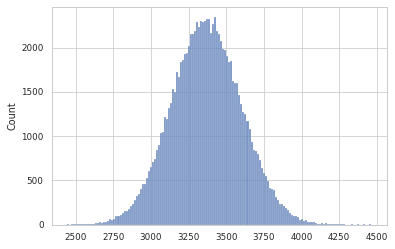

In [80]:
sns.histplot(data=serie_finconc_means);

In [81]:
serie_finconc_means.skew()

0.03586800557862602

In [82]:
serie_finconc_means.kurtosis()

-0.00347433452957846

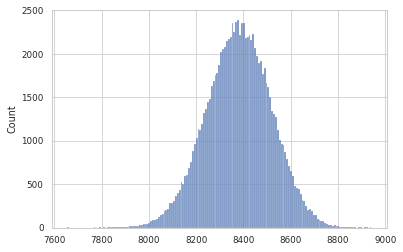

In [83]:
sns.histplot(data=serie_accvac_means);

In [84]:
serie_accvac_means.skew()

-0.07557466957502298

In [85]:
serie_accvac_means.kurtosis()

-0.008667685061502617

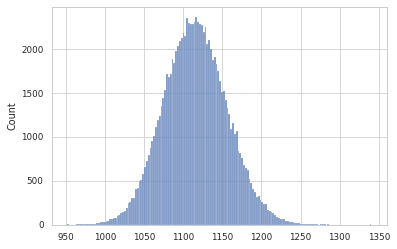

In [86]:
sns.histplot(data=serie_barrsidef_means);

In [87]:
serie_barrsidef_means.skew()

0.08974182008503981

In [88]:
serie_barrsidef_means.kurtosis()

0.016237800195914254

###### _5.2.3. **Error estándar**_

Error estandar: 231.06868232000326
Valor mínimo: 2442.72
Valor máximo: 4464.28
Rango: 2021.56


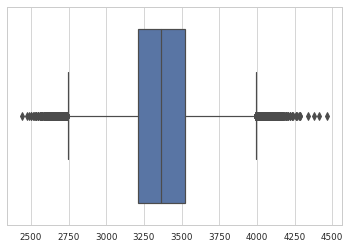

In [89]:
print(f'Error estandar: {serie_finconc_means.std()}')
print(f'Valor mínimo: {serie_finconc_means.min()}')
print(f'Valor máximo: {serie_finconc_means.max()}')
print(f'Rango: {serie_finconc_means.max() - serie_finconc_means.min()}')
sns.boxplot(x = serie_finconc_means);

Error estandar: 137.06227603779587
Valor mínimo: 7653.6
Valor máximo: 8941.8
Rango: 1288.199999999999


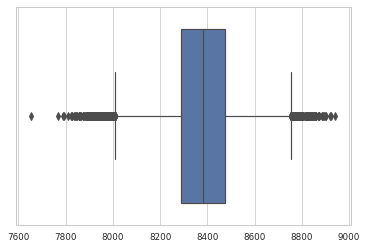

In [90]:
print(f'Error estandar: {serie_accvac_means.std()}')
print(f'Valor mínimo: {serie_accvac_means.min()}')
print(f'Valor máximo: {serie_accvac_means.max()}')
print(f'Rango: {serie_accvac_means.max() - serie_accvac_means.min()}')
sns.boxplot(x = serie_accvac_means);

Error estandar: 40.330662143015815
Valor mínimo: 951.38
Valor máximo: 1340.68
Rango: 389.30000000000007


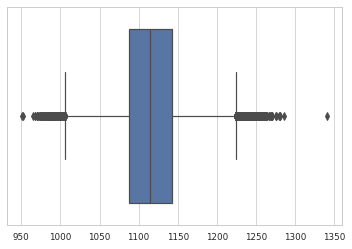

In [91]:
print(f'Error estandar: {serie_barrsidef_means.std()}')
print(f'Valor mínimo: {serie_barrsidef_means.min()}')
print(f'Valor máximo: {serie_barrsidef_means.max()}')
print(f'Rango: {serie_barrsidef_means.max() - serie_barrsidef_means.min()}')
sns.boxplot(x = serie_barrsidef_means);

###### _5.3.4. **Intervalos de confianza**_

Intervalo de 95% confianza de la media: 2917.9790000000003 < 3367.1733371999544 < 3823.6
Intervalo de 95% confianza de la media: 3367.1733371999544 +/- 452.8104999999998


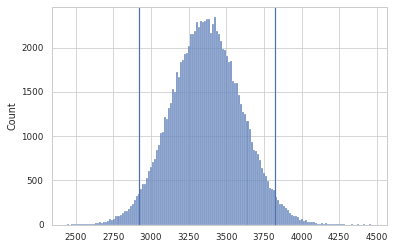

In [92]:
lim_inf = serie_finconc_means.quantile(0.025)
lim_sup = serie_finconc_means.quantile(0.975)
print(f'Intervalo de 95% confianza de la media: {lim_inf} < {serie_finconc_means.mean()} < {lim_sup}')
print(f'Intervalo de 95% confianza de la media: {serie_finconc_means.mean()} +/- {((serie_finconc_means.mean() - lim_inf) + (lim_sup - serie_finconc_means.mean())) / 2}')
sns.histplot(data = serie_finconc_means)
plt.axvline(lim_inf)
plt.axvline(lim_sup);

Intervalo de 95% confianza de la media: 8106.4385 < 8380.018495999842 < 8643.5005
Intervalo de 95% confianza de la media: 8380.018495999842 +/- 268.53099999999995


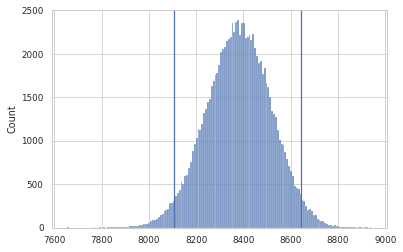

In [93]:
lim_inf = serie_accvac_means.quantile(0.025)
lim_sup = serie_accvac_means.quantile(0.975)
print(f'Intervalo de 95% confianza de la media: {lim_inf} < {serie_accvac_means.mean()} < {lim_sup}')
print(f'Intervalo de 95% confianza de la media: {serie_accvac_means.mean()} +/- {((serie_accvac_means.mean() - lim_inf) + (lim_sup - serie_accvac_means.mean())) / 2}')
sns.histplot(data = serie_accvac_means)
plt.axvline(lim_inf)
plt.axvline(lim_sup);

Intervalo de 95% confianza de la media: 1038.3995 < 1115.404058200003 < 1196.4405
Intervalo de 95% confianza de la media: 1115.404058200003 +/- 79.02049999999997


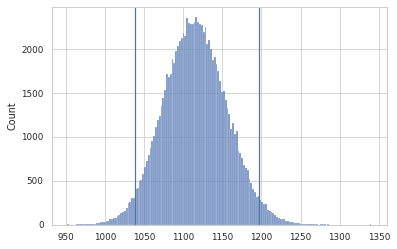

In [94]:
lim_inf = serie_barrsidef_means.quantile(0.025)
lim_sup = serie_barrsidef_means.quantile(0.975)
print(f'Intervalo de 95% confianza de la media: {lim_inf} < {serie_barrsidef_means.mean()} < {lim_sup}')
print(f'Intervalo de 95% confianza de la media: {serie_barrsidef_means.mean()} +/- {((serie_barrsidef_means.mean() - lim_inf) + (lim_sup - serie_barrsidef_means.mean())) / 2}')
sns.histplot(data = serie_barrsidef_means)
plt.axvline(lim_inf)
plt.axvline(lim_sup);

#### _5.3. **Regresión lineal múltiple**_

###### _5.3.1. Preparación de la Regresión Lineal Múltiple_

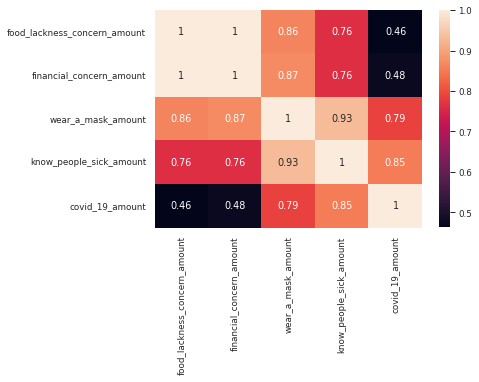

In [95]:
df_regmult = pd.DataFrame()
df_regmult.insert(0,'covid_19_amount', df1['covid_19']['indicator_percentage']*df1['covid_19']['sample_size'])
df_regmult.insert(0,'know_people_sick_amount', df1['know_people_sick']['indicator_percentage']*df1['know_people_sick']['sample_size'])
df_regmult.insert(0,'wear_a_mask_amount', df1['wear_a_mask']['indicator_percentage']*df1['wear_a_mask']['sample_size'])
df_regmult.insert(0,'financial_concern_amount', df1['financial_concern']['indicator_percentage']*df1['financial_concern']['sample_size'])
df_regmult.insert(0,'food_lackness_concern_amount', df1['food_lackness_concern']['indicator_percentage']*df1['food_lackness_concern']['sample_size'])
sns.heatmap(df_regmult.corr(), annot=True);

###### _5.3.2. División, entrenamiento y obtención del 'score' de la Regresión Lineal Múltiple_

In [96]:
from sklearn.model_selection import train_test_split
X1 = df_regmult[['know_people_sick_amount', 'wear_a_mask_amount','financial_concern_amount','food_lackness_concern_amount']]
Y1 = df_regmult['covid_19_amount']
X1_training, X1_test, Y1_training, Y1_test = train_test_split(X1, Y1, test_size=0.3, shuffle=True)
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1.fit(X1_training, Y1_training)
lr1.score(X1_test, Y1_test)

0.8889961385896689

In [97]:
from sklearn.model_selection import train_test_split
X2 = df_regmult[['covid_19_amount','wear_a_mask_amount','financial_concern_amount','food_lackness_concern_amount']]
Y2 = df_regmult['know_people_sick_amount']
X2_training, X2_test, Y2_training, Y2_test = train_test_split(X2, Y2, test_size=0.3, shuffle=True)
from sklearn.linear_model import LinearRegression
lr2 = LinearRegression()
lr2.fit(X2_training, Y2_training)
lr2.score(X2_test, Y2_test)

0.9408854235446981

In [98]:
from sklearn.model_selection import train_test_split
X3 = df_regmult[['covid_19_amount','wear_a_mask_amount','financial_concern_amount','know_people_sick_amount']]
Y3 = df_regmult['food_lackness_concern_amount']
X3_training, X3_test, Y3_training, Y3_test = train_test_split(X3, Y3, test_size=0.3, shuffle=True)
from sklearn.linear_model import LinearRegression
lr3 = LinearRegression()
lr3.fit(X3_training, Y3_training)
lr3.score(X3_test, Y3_test)

0.9975223230843583

###### _5.3.3. Validación Cruzada de K-iteraciones_

In [99]:
scores1 = cross_validate(lr1, X1, Y1, scoring='r2')
print(f'Score del modelo: {scores1["test_score"].mean():.3f} +/- {scores1["test_score"].std():.3f}')

Score del modelo: 0.884 +/- 0.001


Se puede predecir con 88.4% de confianza la cantidad de personas contagiadas sabiendo la otra información. Esto puede ayudar a reconfirmar las pruebas de laboratorio o la palabra de los asistentes según el origen del diagnóstico.

In [100]:
scores2 = cross_validate(lr2, X2, Y2, scoring='r2')
print(f'Score del modelo: {scores2["test_score"].mean():.3f} +/- {scores2["test_score"].std():.3f}')

Score del modelo: 0.941 +/- 0.002


Se puede predecir con 94.1% de confianza la cantidad de personas que conocen a alguien contagiado sabiendo la otra información. Esto puede ayudar a validar la declaración de los asistentes respecto a su vínculo.

In [101]:
scores3 = cross_validate(lr3, X3, Y3, scoring='r2')
print(f'Score del modelo: {scores3["test_score"].mean():.3f} +/- {scores3["test_score"].std():.3f}')

Score del modelo: 0.998 +/- 0.000


Se puede predecir con 99.8% de confianza la cantidad de personas que se preocupan de su falta de alimentos conociendo la demás información. Esto no es una sorpresa pues la correlación con la variable de preocupación financiera es casi perfecta.

## _**Sesión 6:** Visualización de datos avanzada_

In [102]:
%matplotlib inline

In [103]:
df_visual = df_regmult.copy();
df_visual.insert(5,'high_covid_19_amount',df_visual['covid_19_amount'].quantile(0.75)<df_visual['covid_19_amount'])
df_visual.head()

,food_lackness_concern_amount,financial_concern_amount,wear_a_mask_amount,know_people_sick_amount,covid_19_amount,high_covid_19_amount
0,2923.300273,4405.280776,6706.167615,2066.578956,195.712309,False
1,3274.338255,4862.687542,7533.336456,2090.202016,190.749000,False
2,3250.450840,4838.155344,7493.669274,2162.543418,238.977000,False
3,3259.728854,4795.542620,7392.770640,2078.025386,241.780140,False
4,3084.109124,4548.182970,7360.133184,2088.438010,209.874080,False


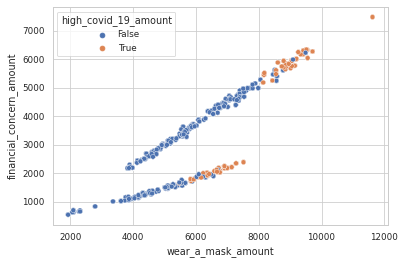

In [104]:
sns.scatterplot( x=df_visual['wear_a_mask_amount'], y=df_visual['financial_concern_amount'], hue=df_visual['high_covid_19_amount']);

En esta visualización avanzada podemos observar que:
-	Hay una relación casi lineal entre la preocupación financiera y utilizar cubre bocas. Sin embargo, parecen existir dos tipos de poblaciones con susceptibilidades diferentes a utilizarlo. Quizá exista una relación con los niveles económicos de los encuestados cada día.
-	Ambas poblaciones identificables cumplen que a mayor preocupación financiera mayor probabilidad de utilizar el cubre bocas.
-	También puede observarse que para ambos tipos de población los máximos de preocupación y uso de cubre bocas se alcanzan en los días que hay más personas contagiadas de covid 19.


In [105]:
df_visual['population_type'] = ["1" if s <= 4000 else "2" for s in (4*df_visual['financial_concern_amount']-df_visual['wear_a_mask_amount'])] 

In [106]:
df_visual_tipo1 = df_visual[df_visual['population_type']=='1']
df_visual_tipo2 = df_visual[df_visual['population_type']=='2']

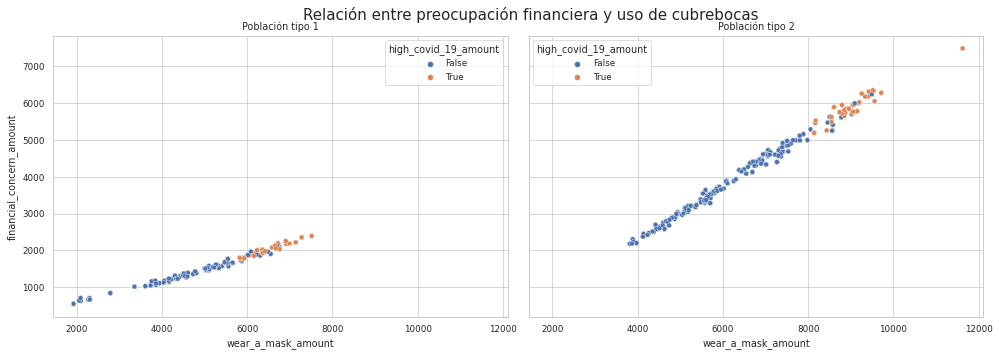

In [107]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(14, 5))
axes = fig.subplots(1, 2, sharex=True, sharey=True)
sns.scatterplot( x=df_visual_tipo1['wear_a_mask_amount'], y=df_visual_tipo1['financial_concern_amount'], ax=axes[0], hue=df_visual_tipo1['high_covid_19_amount'])
sns.scatterplot( x=df_visual_tipo2['wear_a_mask_amount'], y=df_visual_tipo2['financial_concern_amount'], ax=axes[1], hue=df_visual_tipo2['high_covid_19_amount'])
axes[0].set_title('Población tipo 1')
axes[1].set_title('Población tipo 2')
fig.suptitle('Relación entre preocupación financiera y uso de cubrebocas', fontsize=15, x=0.53)
plt.tight_layout()
plt.subplots_adjust(top=0.9)

Separando las poblaciones es más clara la relación lineal y se pueden entrenar regresiones lineales simples.

In [108]:
from sklearn.model_selection import train_test_split
X1 = df_visual_tipo1[['wear_a_mask_amount']]
Y1 = df_visual_tipo1['financial_concern_amount']
X1_training, X1_test, Y1_training, Y1_test = train_test_split(X1, Y1, test_size=0.3, shuffle=True)
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1.fit(X1_training, Y1_training)
lr1.score(X1_test, Y1_test)

scores1 = cross_validate(lr1, X1, Y1, scoring='r2')
print(f'Score del modelo: {scores1["test_score"].mean():.3f} +/- {scores1["test_score"].std():.3f}')

Score del modelo: 0.980 +/- 0.000


In [109]:
from sklearn.model_selection import train_test_split
X2 = df_visual_tipo1[['wear_a_mask_amount']]
Y2 = df_visual_tipo1['financial_concern_amount']
X2_training, X2_test, Y2_training, Y2_test = train_test_split(X2, Y2, test_size=0.3, shuffle=True)
from sklearn.linear_model import LinearRegression
lr2 = LinearRegression()
lr2.fit(X2_training, Y2_training)
lr2.score(X2_test, Y2_test)

scores2 = cross_validate(lr2, X2, Y2, scoring='r2')
print(f'Score del modelo: {scores2["test_score"].mean():.3f} +/- {scores2["test_score"].std():.3f}')

Score del modelo: 0.980 +/- 0.000


En ambos casos se logra predecir con una alta probabilidad el número de personas con preocupación financiera considerando cuantas personas usan cubre boca. Para que esta predicción funcione se necesita saber de antemano de que grupo poblacional visitan ese día o que la cantidad de cubre bocas sea extrema menor o extrema mayor.

Todo gracias a la visualización avanzada

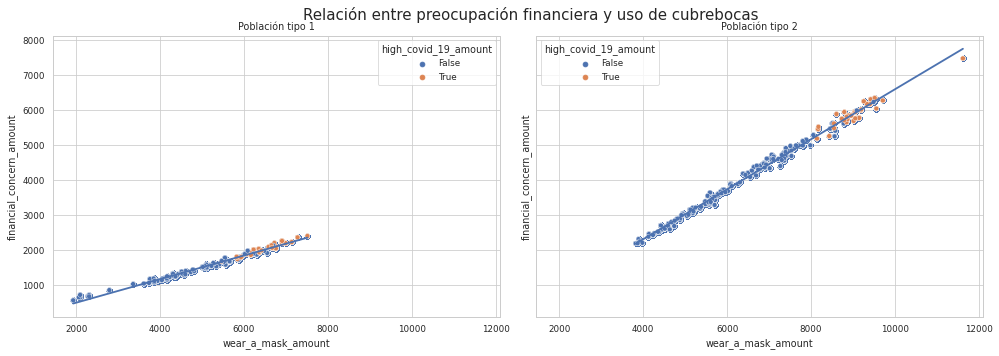

In [110]:
Y1_pred = lr1.predict(X1)
Y2_pred = lr2.predict(X2)
sns.set_style('whitegrid')
fig = plt.figure(figsize=(14, 5))
axes = fig.subplots(1, 2, sharex=True, sharey=True)
sns.regplot(x=df_visual_tipo1['wear_a_mask_amount'],y=df_visual_tipo1['financial_concern_amount'],ax=axes[0])
sns.scatterplot( x=df_visual_tipo1['wear_a_mask_amount'], y=df_visual_tipo1['financial_concern_amount'], ax=axes[0], hue=df_visual_tipo1['high_covid_19_amount'])
sns.regplot(x=df_visual_tipo2['wear_a_mask_amount'],y=df_visual_tipo2['financial_concern_amount'],ax=axes[1])
sns.scatterplot( x=df_visual_tipo2['wear_a_mask_amount'], y=df_visual_tipo2['financial_concern_amount'], ax=axes[1], hue=df_visual_tipo2['high_covid_19_amount'])
axes[0].set_title('Población tipo 1')
axes[1].set_title('Población tipo 2')
fig.suptitle('Relación entre preocupación financiera y uso de cubrebocas', fontsize=15, x=0.53)
plt.tight_layout()
plt.subplots_adjust(top=0.9)

## _**Sesión 7:** Pruebas A/B y Procesamiento de lenguaje natural_

In [111]:
# Importamos las librerías que se usarán en esta parte.

import re
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
nltk.download("punkt")
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#### _7.1. Evaluación de una **prueba A/B**_

Dado que nuestro proyecto no puede hacer uso de una prueba A/B o una evaluación de la misma, decidimos obtener un dataset que no está relacionado para practicar las técnicas empleadas en el análisis de estas pruebas.

Nuestro dataset proviene de una compañía de videojuegos que ha realizado una prueba A/B sobre el comportamiento de sus jugadores en el juego para móviles Cookie Cats. 

Su objetivo era ver si los usuarios jugaban más si la una reja (un obstáculo que impide el progreso en los niveles) estuviera en el nivel 40, en lugar del nivel 30 que es lo normal.

Los jugadores del grupo de control vieron la reja en el nivel 30, mientras que los del grupo experimental la vieron hasta el nivel 40. En las columnas del dataset se registraró el id de cada usuario, el grupo al cual pertenecen, la cantidad de rondas que jugaron, si siguieron jugando después de un día y si siguieron jugando después de una semana.

Para nuestro estudio, solo usaremos el grupo y las rondas.

Más información acerca del dataset se puede consultar en: https://www.kaggle.com/yufengsui/mobile-games-ab-testing

In [112]:
cats_df = pd.read_csv("https://raw.githubusercontent.com/armando-lv/BEDU-Equipo3-AnalisisPython/main/cookie_cats.csv")
cats_df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [113]:
cats_df = cats_df[["version", "sum_gamerounds"]]

Para verificar si existe una diferencia entre el nivel 30 y el 40, usaremos la diferencia entre el promedio de los de 40 menos los de 30.

In [114]:
tcount = cats_df.groupby('version')[["sum_gamerounds"]].mean()
tcount = tcount.rename(columns={"sum_gamerounds": "avg_rounds"})
tcount

,avg_rounds
version,
gate_30,52.456264
gate_40,51.298776


En promedio los del grupo de control jugaron 52.45 rondas, mientras que los del grupo experimental jugaron 51.29. Esto quiere decir que los del grupo 40 en promedio jugaron 1.15 rondas menos.

In [115]:
gate_40_orig_avg_diff = tcount.loc["gate_40"]["avg_rounds"] - tcount.loc["gate_30"]["avg_rounds"]
gate_40_orig_avg_diff

-1.157488453953249

In [116]:
gate_c = cats_df["version"].value_counts()
gate_c

gate_40    45489
gate_30    44700
Name: version, dtype: int64

In [117]:
print(f'El test gate_40 fue {(tcount.loc["gate_40"]["avg_rounds"] / tcount.loc["gate_30"]["avg_rounds"] - 1) * 100:.2f}% menos efectivo que el test gate_30 para motivar a los usuarios a jugar más.')

El test gate_40 fue -2.21% menos efectivo que el test gate_30 para motivar a los usuarios a jugar más.


Los del grupo experimental jugaron en promedio **2.21% menos** que el grupo control. Esto indica que el test **desmotivó** a los usuarios a continuar, pero tenemos que confirmar si esta diferencia es estadísticamente relevante antes de tomar una decisión.

Para confirmar esto, realizaremos un test de permutación donde:
1.  Obtendremos un grupo A del mismo tamaño que el grupo gate_40
2.  Crearemos un grupo B conformado por el resto de los datos
3.  Sacaremos los promedios de cada grupo
4.  Finalmente, restaremos el promedio del grupo A menos el de el grupo B

In [118]:
avgs_a = []
avgs_b = []

for i in range(100):
    a = cats_df.sample(gate_c.loc['gate_40'], replace=False)
    a_val = a["sum_gamerounds"].mean()
    avgs_a.append(a_val)
    
    b = cats_df.loc[~cats_df.index.isin(a.index)]
    b_val = b["sum_gamerounds"].mean()
    avgs_b.append(b_val)

In [119]:
results = pd.DataFrame({
    'avgs_a': avgs_a,
    'avgs_b': avgs_b
})

In [120]:
results["diff_ab"] = results["avgs_a"] - results["avgs_b"]
results

,avgs_a,avgs_b,diff_ab
0,51.489327,52.262349,-0.773022
1,51.716283,52.031387,-0.315104
2,51.380048,52.373557,-0.993509
3,52.708435,51.021723,1.686712
4,51.468421,52.283624,-0.815203
...,...,...,...
95,51.525446,52.225593,-0.700147
96,50.963991,52.796957,-1.832966
97,52.421355,51.313870,1.107484
98,52.229726,51.508881,0.720844


Ahora debemos graficar la distribucion de las diferencias que sacamos en diff_ab, y pondremos con una línea la diferencia que sacamos en el conjunto de datos original.

Como vemos, la diferencia original se encuentra dentro de la distribución. Esto indica que es un valor normal, y la reducción en motivación entre los grupos no tiene relevancia estadística.

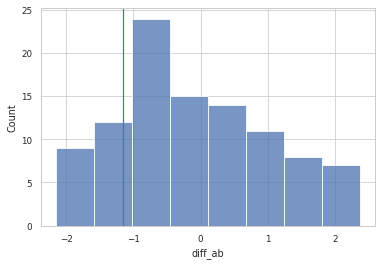

In [121]:
sns.histplot(results["diff_ab"])
plt.axvline(gate_40_orig_avg_diff);

Para ver nuestro resultado en términos numéricos, sacamos el valor P. Nos dió 0.73, que es un valor mucho mayor a 0.05, por lo tanto nuestro resultado no tiene relevancia estadísticamente significativa.

In [122]:
(results['diff_ab'] >= gate_40_orig_avg_diff).sum() / results.shape[0]

0.83

#### _7.2. Presentación del dataset y procesamiento de texto_

**Dataset**
Utilizamos un dataset obtenido de Kaggle que juntó tweets acerca de las distintas vacunas contra el COVID-19, incluyendo Pfizer, Sinovac y Moderna. Estos tweets se obtuvieron con ayuda de Tweepy. Todos los tweets están en inglés. Mas información acerca del conjunto se puede consultar en: https://www.kaggle.com/gpreda/all-covid19-vaccines-tweets

El dataset completo contiene varias columnas, con nombres, ubicaciones y fechas. Para los fines de nuesto análisis de lenguaje, solo haremos uso de la columna text, la cual contiene el texto de un tweet. Cabe recalcar que cada renglón es un tweet.

In [123]:
tweet_df = pd.read_csv("https://raw.githubusercontent.com/armando-lv/BEDU-Equipo3-AnalisisPython/main/vaccination_all_tweets_only_text.csv")
tweet_df.head()

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...


In [124]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193272 entries, 0 to 193271
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    193272 non-null  object
dtypes: object(1)
memory usage: 1.5+ MB


Después de checar la información de nuestro dataframe, vimos que tiene casi 200 mil tweets. Si queremos convertirlos en un objeto de texto tardaría demasiado, así que solo tomamos como muestra 25 mil.

In [125]:
tweet_text = tweet_df.sample(n=25000, random_state=1)["text"]

Usamos la funcion de_emojify sobre nuestros tweets para quitar todos los emojis. De esta manera no interfieren con nuestro análisis de texto.

In [126]:
def de_emojify(string):
    return string.encode('ascii', 'ignore').decode('ascii')

In [127]:
tweet_text.apply(de_emojify)

59821     @Pun_Jaab @kamalsinghbrar Which one ? #Covaxin...
44291     Interested in learning more about the efficien...
72919     Kizzmekia Corbett - The Scientist Central to t...
86642     Thanks to @BertyThomas \nJust because of ur al...
128159    Pfizer-BioNTech says booster shot provides bet...
                                ...                        
145892    @SamHarrisOrg Here in the developing world we ...
36443     I got my vaccine and they didnt even give me a...
129081    #Concordian was able to secure close to 200 do...
192355    Pincode: 560010\nCOVAXIN - Dose 2: 25 slots\n\...
22875     The #Russian Direct Investment Fund (RDIF) on ...
Name: text, Length: 25000, dtype: object

Muchos de estos tweets contienen nombres de cuentas como @Juan o @Beto, URLs y hashtags. Con el fin de deshacernos de estas cosas, así como quitar los números y otros carácteres especiales, usamos replace() con Regex.

In [128]:
tweet_text = tweet_text.str.lower()
tweet_text = tweet_text.str.strip()
# Quitar nombres de usuario de Twitter
tweet_text = tweet_text.str.replace("@[^\s]+", "")
# Quitar urls/enlaces
tweet_text = tweet_text.str.replace("http\S+", "")
# Quitar hashtags
tweet_text = tweet_text.str.replace("\B#\S+", "")
# Dejar solo texto
tweet_text = tweet_text.str.replace("[^\w\s]", "")
tweet_text = tweet_text.str.replace("\n", "")
tweet_text = tweet_text.str.replace("\d", "")
tweet_text = tweet_text.dropna()
tweet_text.head()

59821                                         which one    
44291     interested in learning more about the efficien...
72919     kizzmekia corbett  the scientist central to th...
86642     thanks to  just because of ur alerts i was abl...
128159    pfizerbiontech says booster shot provides bett...
Name: text, dtype: object

#### _7.3. Análisis de lenguaje con **Nltk**_

Aplicamos tokenize a nuestros tweets para luego convertir el texto de los tweets en un objeto de text.


In [129]:
token = tweet_text.apply(nltk.word_tokenize)
token 

59821                                          [which, one]
44291     [interested, in, learning, more, about, the, e...
72919     [kizzmekia, corbett, the, scientist, central, ...
86642     [thanks, to, just, because, of, ur, alerts, i,...
128159    [pfizerbiontech, says, booster, shot, provides...
                                ...                        
145892    [here, in, the, developing, world, we, get, to...
36443     [i, got, my, vaccine, and, they, didnt, even, ...
129081    [was, able, to, secure, close, to, doses, of, ...
192355    [pincode, covaxin, dose, slotsage, and, above,...
22875     [the, direct, investment, fund, rdif, on, thur...
Name: text, Length: 25000, dtype: object

In [130]:
tweet_words = token.sum()
all_text = nltk.Text(tweet_words)
all_text

<Text: which one interested in learning more about the...>

Inicialmente, cuando le dimos una ojeada a nuestro dataset vimos que las palabras dose, vaccine y covid salen a menudo. Claro, es gracias a que el tema del conjunto de tweets es la vacunación contra el Covid. Para ver que palabras se usan con frecuencia al lado o cerca de estas, similar.

In [131]:
all_text.similar("dose")

shot vaccine jab of doses today and the done one is vaccination
moderna for in on covid shots covaxin day


In [132]:
all_text.similar("vaccine")

vaccines the shot dose vaccination and jab covid covaxin moderna is
first in today one it second world india this


In [133]:
all_text.similar("covid")

the vaccine moderna coronavirus a and first my covaxin chinese
vaccines its nd dose or sinopharm mrna pfizer second this


Entre las palabras similares de dose, vaccine y covid, vemos mencionadas todas las tres palabras o sinónimos de ellas. También encontramos la palabra covaxin, un nuevo término que hace referencia a toda vacuna que lucha contra el Covid. Moderna también es otra palabra que sale entre los tres conjuntos.

Aquí vemos en qué contextos se usan las palabras covid y vaccine. Muchas de estas palabras son palabras vacías, las cuales quitaremos después.

In [134]:
all_text.common_contexts(['covid', 'vaccine'])

of_vaccine first_shot your_shot the_vaccine of_and had_last
coronavirus_in of_in second_shot the_and the_donated first_jab of_done
your_vaccine russian_vaccine of_after of_this the_with the_yesterday
of_doses


Estas son expresiones de múltiples palabras que se ven a menudo dentro de nuestros tweets.

In [135]:
all_text.collocations()

pincode covaxin; dose slotsage; covaxin dose; aug fees; sep fees;
agesdate sep; covid vaccine; agesdate aug; side effects; date jul;
emergency use; paid slots; slots paid; fully vaccinated; pmfree slots;
first dose; jul fees; bharat biotech; amfree slots; million doses


Al obtener cuantas palabras únicas hay en nuestro texto y dividirlas entre las palabras totales, obtenemos el nivel de riqueza léxica en nuestros tweets. Aquí el nivel de riqueza es de 6.50%

In [136]:
len(set(all_text)) / len(all_text) * 100

6.504553220428948

Usamos nltk para deshacernos de las palabras vacías, algunos ejemplos en inglés son the, a y of, que no agregan mucho significado a las oraciones pero se usan para darle forma y que se alínie a las reglas de la gramática. 

Aparte de quitar las palabras, creamos un objeto FreqDist con el nuevo conjunto de palabras.

In [137]:
eng_sw = stopwords.words('english')
all_words_nsw = [word for word in all_text if word not in eng_sw]
fdist_nsw = nltk.FreqDist(all_words_nsw)

Ya que tenemos nuestro FreqDist sin palabras vacías, hay que ver las palabras más comunes.

In [138]:
fdist_nsw.most_common(50)

[('dose', 5409),
 ('vaccine', 4793),
 ('slots', 2399),
 ('covid', 1984),
 ('covaxin', 1692),
 ('age', 1654),
 ('first', 1591),
 ('got', 1507),
 ('hospital', 1309),
 ('vaccines', 1238),
 ('pincode', 1178),
 ('slotsage', 1173),
 ('fees', 1161),
 ('doses', 1115),
 ('get', 1093),
 ('vaccinated', 1087),
 ('amp', 1054),
 ('today', 1042),
 ('shot', 986),
 ('second', 981),
 ('nd', 913),
 ('vaccination', 762),
 ('agesdate', 754),
 ('india', 713),
 ('st', 707),
 ('moderna', 685),
 ('people', 683),
 ('apollo', 674),
 ('one', 651),
 ('health', 584),
 ('availability', 544),
 ('new', 521),
 ('aug', 513),
 ('us', 505),
 ('done', 498),
 ('im', 487),
 ('date', 480),
 ('good', 467),
 ('use', 465),
 ('like', 465),
 ('sep', 457),
 ('million', 452),
 ('jab', 449),
 ('v', 446),
 ('received', 440),
 ('days', 435),
 ('p', 433),
 ('sputnik', 432),
 ('fully', 424),
 ('effective', 404)]

Una vez que quitamos las palabras vacías, buscamos palabras largas (que tengan más de 8 letras) que salgan con frecuencia.

In [139]:
aw_unique = set(all_words_nsw)
aw_unique = pd.Series(list(aw_unique))
longer7 = aw_unique.str.len() > 7
freq_longer7 = aw_unique.apply(lambda x: fdist_nsw[x] > 7)
aw_unique[longer7 & freq_longer7]

75          pharmacy
105      adolescents
133        scheduled
135        cloudnine
163       comparison
            ...     
19268     nationwide
19280       supposed
19296       solitare
19348       remember
19451      awareness
Length: 781, dtype: object

¿Cuántas veces se mencionan tres de las palabras más usadas? Para obtener los porcentajes, dividimos la cantidad de veces que se usa cada palabra entre el total de palabras.

In [140]:
print(f'{(100 * fdist_nsw["covid"] / len(all_words_nsw)):.2f}%')

1.06%


In [141]:
print(f'{(100 * fdist_nsw["dose"] / len(all_words_nsw)):.2f}%')

2.88%


In [142]:
print(f'{(100 * fdist_nsw["vaccine"] / len(all_words_nsw)):.2f}%')

2.55%


De la totalidad de las palabras, covid forma el 1.05%, dose forma el 2.87% y vaccine el 2.55%. Las tres juntas son el 6.47% de las palabras en los tweets, al no contar las vacías.

Esto quiere decir que si sacas 20 palabras al azar del conjunto que no tiene vacías, lo más probable es que una de ellas sea una de estas tres.

#### _7.4. Visualizaciones de distribuciones y frecuencias_

Generamos una distribución con las palabras más utilizadas. Aquí se ve como las primeras dos palabras (dose y vaccine) conforman aproximadamente el 20% del total.

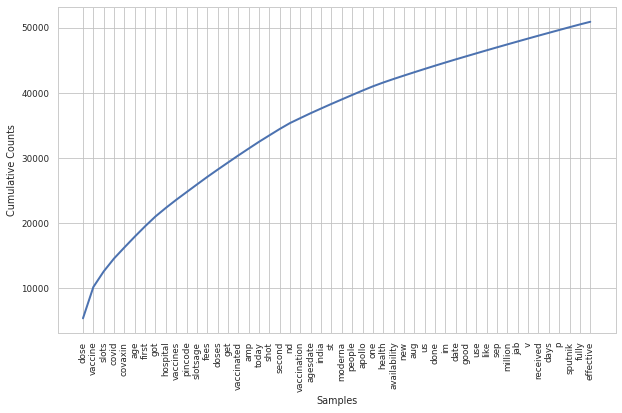

In [143]:
fig = plt.figure(figsize=(10, 6))
fdist_nsw.plot(50, cumulative=True);

In [144]:
top50 = fdist_nsw.most_common(50)
top50

[('dose', 5409),
 ('vaccine', 4793),
 ('slots', 2399),
 ('covid', 1984),
 ('covaxin', 1692),
 ('age', 1654),
 ('first', 1591),
 ('got', 1507),
 ('hospital', 1309),
 ('vaccines', 1238),
 ('pincode', 1178),
 ('slotsage', 1173),
 ('fees', 1161),
 ('doses', 1115),
 ('get', 1093),
 ('vaccinated', 1087),
 ('amp', 1054),
 ('today', 1042),
 ('shot', 986),
 ('second', 981),
 ('nd', 913),
 ('vaccination', 762),
 ('agesdate', 754),
 ('india', 713),
 ('st', 707),
 ('moderna', 685),
 ('people', 683),
 ('apollo', 674),
 ('one', 651),
 ('health', 584),
 ('availability', 544),
 ('new', 521),
 ('aug', 513),
 ('us', 505),
 ('done', 498),
 ('im', 487),
 ('date', 480),
 ('good', 467),
 ('use', 465),
 ('like', 465),
 ('sep', 457),
 ('million', 452),
 ('jab', 449),
 ('v', 446),
 ('received', 440),
 ('days', 435),
 ('p', 433),
 ('sputnik', 432),
 ('fully', 424),
 ('effective', 404)]

In [145]:
words50 = [w[0] for w in top50]
nums50 = [w[1] for w in top50]

Una vez obtenido el conteo de las 50 palabras con mayor frecuencia, usamos seaborn para visualizar una barra de gráficos que nos muestre los datos. La mayoría de las palabras tienen un tono neutral, así que es posible que en promedio los tweets de nuestra muestra tengan intenciones informativas y comunicativas, en lugar de estar en contra de la vacuna.

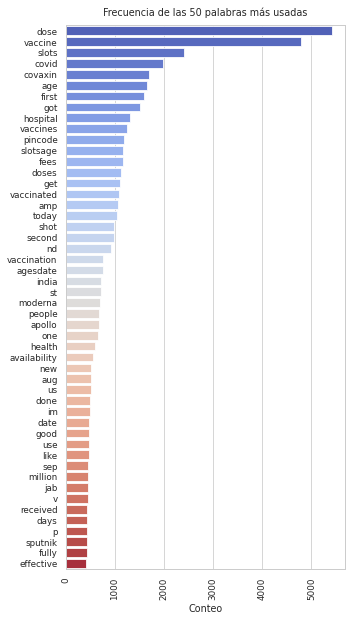

In [146]:
fig = plt.figure(figsize=(5,10))
ax = fig.add_subplot()

sns.barplot(x=nums50, y=words50, ax=ax, palette="coolwarm");
ax.set_title('Frecuencia de las 50 palabras más usadas', pad=10)
ax.set_xlabel('Conteo')
ax.tick_params(axis='x', rotation=90)

In [147]:
fdist_bigrams = nltk.FreqDist(list(nltk.bigrams(all_text)))
top25bi = fdist_bigrams.most_common(25)
top25bi

[(('slots', 'on'), 1523),
 (('age', 'd'), 1478),
 (('d', 'd'), 1478),
 (('d', 'slots'), 1478),
 (('dose', 'slotsage'), 1173),
 (('of', 'the'), 1172),
 (('covaxin', 'dose'), 1114),
 (('dose', 'at'), 1114),
 (('pincode', 'covaxin'), 1108),
 (('dose', 'of'), 1022),
 (('and', 'above'), 997),
 (('slotsage', 'and'), 990),
 (('covid', 'vaccine'), 835),
 (('above', 'all'), 767),
 (('all', 'agesdate'), 754),
 (('the', 'vaccine'), 689),
 (('doses', 'of'), 660),
 (('in', 'the'), 659),
 (('got', 'my'), 652),
 (('first', 'dose'), 587),
 (('for', 'at'), 526),
 (('slots', 'dose'), 522),
 (('availability', 'for'), 518),
 (('nd', 'dose'), 487),
 (('aug', 'fees'), 478)]

In [148]:
words25bi = [x[0] for x in top25bi]
nums25bi = [x[1] for x in top25bi]
words25bistr = [i[0]+", "+i[1] for i in words25bi]

Realizamos el mismo proceso con los bigramas, haciendo inclusión de las palabras vacías.

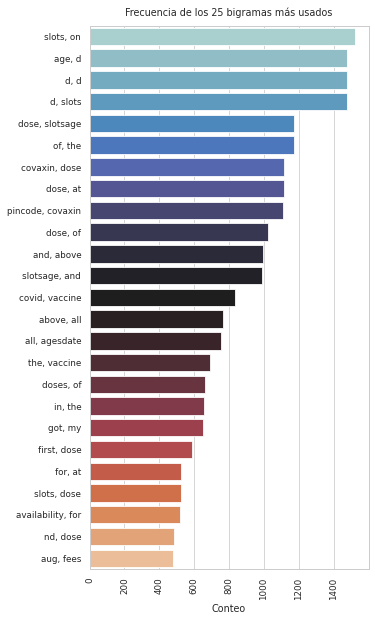

In [149]:
fig = plt.figure(figsize=(5,10))
ax = fig.add_subplot()

sns.barplot(x=nums25bi, y=words25bistr, ax=ax, palette="icefire");
ax.set_title('Frecuencia de los 25 bigramas más usados', pad=10)
ax.set_xlabel('Conteo')
ax.tick_params(axis='x', rotation=90)

In [150]:
fdist_bigrams_ns = nltk.FreqDist(list(nltk.bigrams(all_words_nsw)))
top25bi_ns = fdist_bigrams_ns.most_common(25)
top25bi_ns

[(('age', 'slots'), 1480),
 (('dose', 'slotsage'), 1173),
 (('covaxin', 'dose'), 1116),
 (('pincode', 'covaxin'), 1108),
 (('covid', 'vaccine'), 841),
 (('slotsage', 'agesdate'), 754),
 (('first', 'dose'), 588),
 (('slots', 'dose'), 523),
 (('nd', 'dose'), 488),
 (('aug', 'fees'), 478),
 (('sep', 'fees'), 439),
 (('second', 'dose'), 428),
 (('slotsage', 'date'), 407),
 (('agesdate', 'sep'), 393),
 (('got', 'first'), 363),
 (('agesdate', 'aug'), 361),
 (('slots', 'apollo'), 349),
 (('sputnik', 'v'), 347),
 (('st', 'dose'), 336),
 (('paid', 'slots'), 312),
 (('slots', 'paid'), 310),
 (('fully', 'vaccinated'), 289),
 (('availability', 'pmfree'), 285),
 (('pmfree', 'slots'), 285),
 (('side', 'effects'), 273)]

In [151]:
words25bi_ns = [i[0] for i in top25bi_ns]
nums25bi_ns = [i[1] for i in top25bi_ns]
words25bistr_ns = [i[0]+", "+i[1] for i in words25bi_ns]

De nuevo mostramos los bigramas, ahora excluyendo las palabras vacías. Slots, dose y covaxin salen a menudo en estos bigramas.

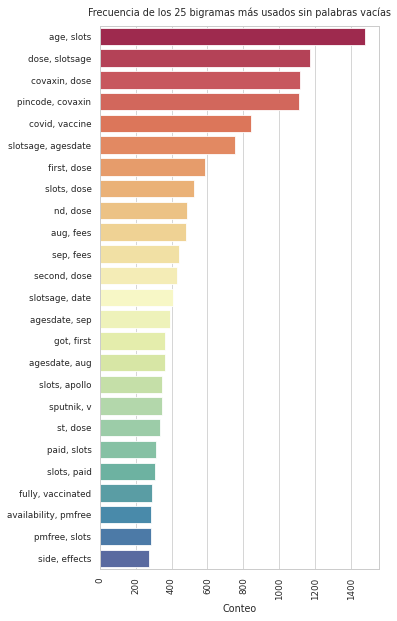

In [152]:
fig = plt.figure(figsize=(5,10))
ax = fig.add_subplot()

sns.barplot(x=nums25bi_ns, y=words25bistr_ns, ax=ax, palette="Spectral");
ax.set_title('Frecuencia de los 25 bigramas más usados sin palabras vacías', pad=10)
ax.set_xlabel('Conteo')
ax.tick_params(axis='x', rotation=90)

In [153]:
fdist_tri = nltk.FreqDist(list(ngrams(all_text, 3)))
top25tri = fdist_tri.most_common(25)

words25tri = [i[0] for i in top25tri]
nums25tri = [i[1] for i in top25tri]
words25tristr = [i[0]+", "+i[1]+", "+i[2] for i in words25tri]

Ahora buscamos los trigramas que tienen la mayor frecuencia. Otra vez incluyendo a las palabras vacías.

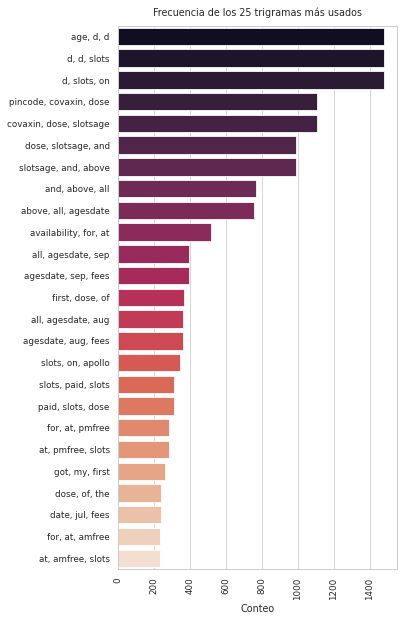

In [154]:
fig = plt.figure(figsize=(5,10))
ax = fig.add_subplot()

sns.barplot(x=nums25tri, y=words25tristr, ax=ax, palette="rocket");
ax.set_title('Frecuencia de los 25 trigramas más usados', pad=10)
ax.set_xlabel('Conteo')
ax.tick_params(axis='x', rotation=90)

In [155]:
fdist_tri_ns = nltk.FreqDist(list(ngrams(all_words_nsw, 3)))
top25tri_ns = fdist_tri_ns.most_common(25)

words25tri_ns = [i[0] for i in top25tri_ns]
nums25tri_ns = [i[1] for i in top25tri_ns]
words25tristr_ns = [i[0]+", "+i[1]+", "+i[2] for i in words25tri_ns]

Ahora los 25 trigramas de mayor frecuencia sin palabras vacías.

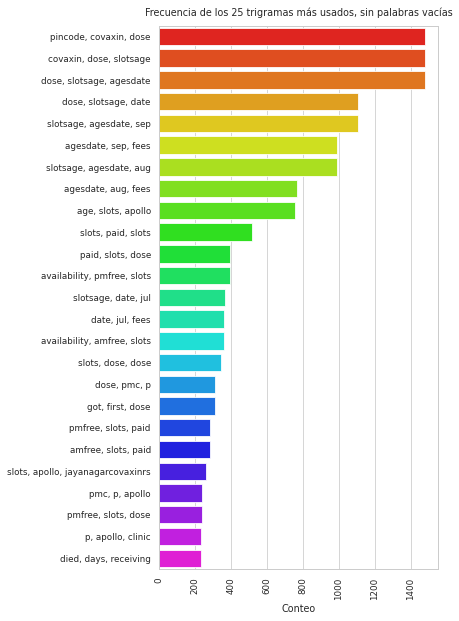

In [156]:
fig = plt.figure(figsize=(5,10))
ax = fig.add_subplot()

sns.barplot(x=nums25tri, y=words25tristr_ns, ax=ax, palette='gist_rainbow');
ax.set_title('Frecuencia de los 25 trigramas más usados, sin palabras vacías', pad=10)
ax.set_xlabel('Conteo')
ax.tick_params(axis='x', rotation=90)

Para ver la composición de nuestros tweets, graficamos la distribución de las longitudes de palabras. La mayoría de las palabras radican entre las 4 y 7 letras y aunque existen palabras de más de 15 letras.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


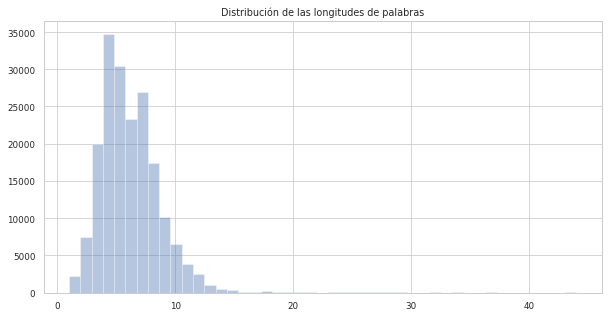

In [157]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()

lengths = [len(i) for i in all_words_nsw]
ax.set_title("Distribución de las longitudes de palabras")
sns.distplot(lengths, bins=max(lengths)+1, kde=False, norm_hist=False);

Ahora mostramos la distribución de las longitudes de los tweets, es decir, cuantos carácteres tiene cada tweet. Si bien el límite es de 280 letras, se recomienda mantener un conteo de 70-140 caracteres para maximizar la atención de los lectores.

Efectivamente, gran parte de los datos se encuentra en este rango.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


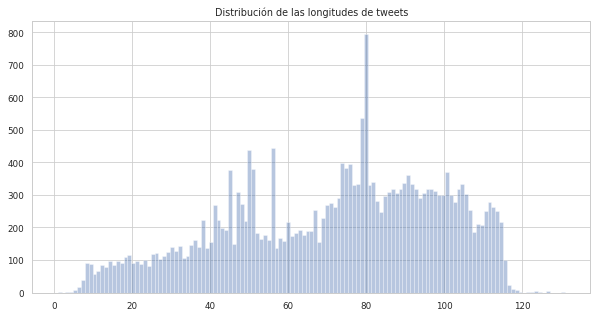

In [158]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()

tweet_lengths = [len(i) for i in tweet_text]
ax.set_title("Distribución de las longitudes de tweets")
sns.distplot(tweet_lengths, bins=max(tweet_lengths), kde=False, norm_hist=False);

Ahora vemos la distribución de las cantidades de palabras por tweet. Parece ser que tener 20 palabras por tweet es lo popular.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


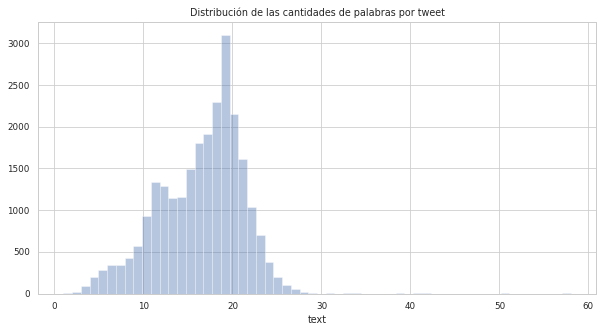

In [159]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()

wordcount = tweet_text.str.split(' ').str.len()
ax.set_title("Distribución de las cantidades de palabras por tweet")
sns.distplot(wordcount, bins=max(wordcount), kde=False, norm_hist=False);

Finalmente, usamos WordCloud para mostrar la frecuencia de palabras mediante tamaños de palabras distintos. De nuevo, vaccine, age y slots predominan en el conjunto.

In [160]:
from wordcloud import WordCloud

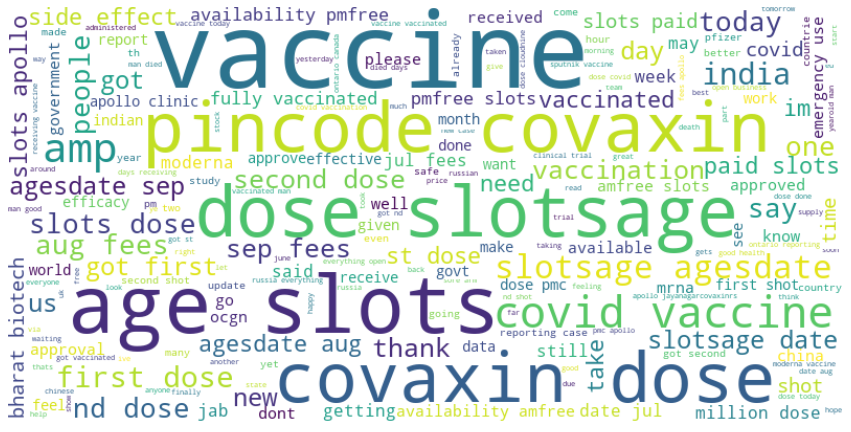

In [168]:
wcloud = WordCloud(width=800, height=400, max_font_size=100, background_color="white").generate(' '.join(all_words_nsw))

plt.figure(figsize=(15, 15))
plt.imshow(wcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## _**Sesión 8:** Introducción a Machine Learning: clasificación no supervisada y supervisada_

#### _8.1. Preparación_

In [162]:
df_rlogistica = df_regmult.copy();
df_rlogistica.insert(5,'high_covid_19_amount',df_visual['covid_19_amount'].quantile(0.65)<df_visual['covid_19_amount'])
df_rlogistica['high_covid_19_amount'] = df_rlogistica['high_covid_19_amount'].apply(lambda x: 1 if x else 0)
df_rlogistica.head()

,food_lackness_concern_amount,financial_concern_amount,wear_a_mask_amount,know_people_sick_amount,covid_19_amount,high_covid_19_amount
0,2923.300273,4405.280776,6706.167615,2066.578956,195.712309,0
1,3274.338255,4862.687542,7533.336456,2090.202016,190.749000,0
2,3250.450840,4838.155344,7493.669274,2162.543418,238.977000,1
3,3259.728854,4795.542620,7392.770640,2078.025386,241.780140,1
4,3084.109124,4548.182970,7360.133184,2088.438010,209.874080,0


In [163]:
X = df_rlogistica.drop(columns=['covid_19_amount', 'high_covid_19_amount'])
Y = df_rlogistica['high_covid_19_amount']
X.head()

,food_lackness_concern_amount,financial_concern_amount,wear_a_mask_amount,know_people_sick_amount
0,2923.300273,4405.280776,6706.167615,2066.578956
1,3274.338255,4862.687542,7533.336456,2090.202016
2,3250.450840,4838.155344,7493.669274,2162.543418
3,3259.728854,4795.542620,7392.770640,2078.025386
4,3084.109124,4548.182970,7360.133184,2088.438010


#### _8.2. Regresión logística_

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
logreg.score(X_test, Y_test)

0.8424528301886792

#### _8.3. Evaluación del modelo_

###### _8.3.1. Matriz de confusión_

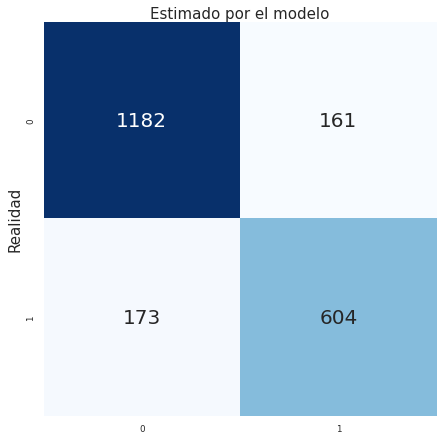

In [165]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [166]:
tn, fp, fn, tp = cnf_matrix.ravel()

print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Exactitud:",metrics.accuracy_score(Y_test, Y_pred))
print("Sensibilidad:",metrics.recall_score(Y_test, Y_pred))
print("Especificidad:", tn / (tn + fp))
# Nótese que el modelo es mucho más que aceptable.

Precision: 0.7895424836601307
Exactitud: 0.8424528301886792
Sensibilidad: 0.7773487773487774
Especificidad: 0.8801191362620998


###### _8.3.2. Curva ROC/AUC_

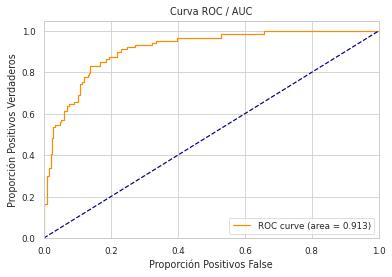

In [167]:
Y_pred_proba = logreg.predict_proba(X_test)
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(Y_test, Y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Proporción Positivos False')
plt.ylabel('Proporción Positivos Verdaderos')
plt.title('Curva ROC / AUC')
plt.legend(loc="lower right")
plt.show()

Nuestra curva ROC/AUC arroja un valor >.98 muy cercano a 1 por lo que nuestro modelo tiene muy buena capacidad predictiva para decidir. Recordemos que logramos predecir con alta precisión si habrá “muchos” contagiados de covid 19 conociendo el número de preocupados por las finanzas, preocupados por la comida, usando cubre bocas y personas que conocen gente contagiada.